# ENSEMBLING

## CASE STUDY 1

## Random Forest - Credit Default Prediction

In this lab, we will build a random forest model to predict whether a given customer defaults or not. Credit default is one of the most important problems in the banking and risk analytics industry. There are various attributes which can be used to predict default, such as demographic data (age, income, employment status, etc.), (credit) behavioural data (past loans, payment, number of times a credit payment has been delayed by the customer etc.).

We'll start the process with data cleaning and preparation and then tune the model to find optimal hyperparameters.

<hr>

### Data Understanding and Cleaning

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('Datasets/credit-card-default.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Let's understand the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
defaulted    30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In this case, we know that there are no major data quality issues, so we'll go ahead and build the model.

<hr>

### Data Preparation and Model Building

In [4]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [5]:
# Putting feature variable to X
X = df.drop('defaulted',axis=1)

# Putting response variable to y
y = df['defaulted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)



#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [6]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [7]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
# Making predictions
predictions = rfc.predict(X_test)

In [9]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [10]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7058
           1       0.60      0.31      0.41      1942

   micro avg       0.81      0.81      0.81      9000
   macro avg       0.72      0.63      0.65      9000
weighted avg       0.78      0.81      0.78      9000



In [11]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6655  403]
 [1331  611]]


In [12]:
print(accuracy_score(y_test,predictions))

0.8073333333333333


So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

<hr>

### Hyperparameter Tuning

The following hyperparameters are present in a random forest classifier. Note that most of these hypereparameters are actually of the decision trees that are in the forest.


- **n_estimators**: integer, optional (default=10): The number of trees in the forest.
- **criterion**: string, optional (default=”gini”)The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- **max_features** : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split:
    - If int, then consider max_features features at each split.
    - If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
    - If “auto”, then max_features=sqrt(n_features).
    - If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
    - If “log2”, then max_features=log2(n_features).
    - If None, then max_features=n_features.
    - Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
- **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **min_samples_split** : int, float, optional (default=2)The minimum number of samples required to split an internal node:**
    - **If int, then consider min_samples_split as the minimum number.
    - **If float, then min_samples_split is a percentage and ceil(min_samples_split, n_samples) are the minimum number of samples for each split.
- **min_samples_leaf** : int, float, optional (default=1)The minimum number of samples required to be at a leaf node:**
    - **If int, then consider min_samples_leaf as the minimum number.**
    - **If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.**
- **min_weight_fraction_leaf** : float, optional (default=0.)The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- **max_leaf_nodes** : int or None, optional (default=None)Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- **min_impurity_split** : float,Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.


<hr>

### Tuning max_depth

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.


In [13]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 1)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [14]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.098936,0.007659,0.005392,0.000794,2,{'max_depth': 2},0.797905,0.801667,0.800714,0.792857,...,0.798143,0.003077,18,0.796297,0.796131,0.800833,0.798274,0.799357,0.798179,0.001799
1,0.142027,0.009632,0.007186,0.001589,3,{'max_depth': 3},0.806713,0.809762,0.808333,0.801429,...,0.806905,0.002903,16,0.806000,0.806190,0.808155,0.806964,0.813047,0.808071,0.002601
2,0.174342,0.006455,0.007584,0.001627,4,{'max_depth': 4},0.812664,0.812857,0.810952,0.804048,...,0.809667,0.003342,11,0.813858,0.811905,0.813571,0.811786,0.811321,0.812488,0.001024
3,0.267485,0.012089,0.009772,0.001716,5,{'max_depth': 5},0.816234,0.819286,0.813571,0.813810,...,0.813905,0.004184,2,0.822430,0.820119,0.817381,0.820893,0.815130,0.819191,0.002608
4,0.257917,0.029653,0.008786,0.002225,6,{'max_depth': 6},0.816710,0.820238,0.811667,0.810476,...,0.813857,0.003963,4,0.826775,0.824464,0.818095,0.821429,0.820844,0.822321,0.003009


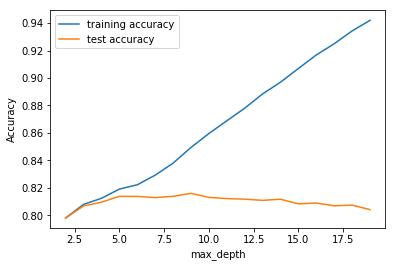

In [16]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

<hr>

### Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>


In [17]:
import gc
gc.collect()

5426

In [18]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 100)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 1500, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [19]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.155104,0.043282,0.033717,0.005134,100,{'n_estimators': 100},0.813616,0.812143,0.811190,0.804762,...,0.809952,0.003172,6,0.813560,0.809583,0.812083,0.813631,0.813821,0.812536,0.001601
1,2.377238,0.119022,0.072812,0.009413,200,{'n_estimators': 200},0.814092,0.814286,0.809286,0.804762,...,0.809905,0.003780,7,0.811834,0.811131,0.810238,0.812679,0.811856,0.811548,0.000818
2,4.309591,0.476287,0.114899,0.012789,300,{'n_estimators': 300},0.812664,0.814048,0.811905,0.805714,...,0.810286,0.003271,1,0.811239,0.810833,0.811369,0.812857,0.812749,0.811810,0.000831
3,5.200105,0.908024,0.147000,0.027895,400,{'n_estimators': 400},0.810997,0.814048,0.810714,0.805476,...,0.809810,0.002931,10,0.810822,0.810655,0.812619,0.812976,0.812095,0.811833,0.000938
4,5.664908,0.093202,0.156170,0.010304,500,{'n_estimators': 500},0.811235,0.814524,0.811429,0.805238,...,0.810048,0.003209,3,0.811001,0.810536,0.811845,0.812381,0.812690,0.811690,0.000813


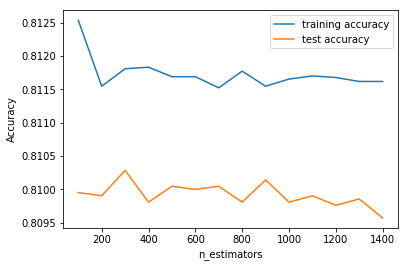

In [20]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [82]:
gc.collect()

2867

In [83]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(50, 401, 50)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(50, 401, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [84]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.789677,0.061248,0.023749,0.002406,50,{'n_estimators': 50},0.811473,0.814762,0.811429,0.807619,...,0.810333,0.003003,2,0.810286,0.811071,0.813810,0.814286,0.810904,0.812071,0.001642
1,1.711432,0.092588,0.045283,0.004969,100,{'n_estimators': 100},0.810045,0.813095,0.808810,0.805714,...,0.808857,0.002617,8,0.809691,0.809762,0.810595,0.811845,0.812273,0.810833,0.001059
2,2.574117,0.176478,0.074402,0.007373,150,{'n_estimators': 150},0.812902,0.814524,0.811190,0.806429,...,0.810524,0.003085,1,0.811417,0.810179,0.811250,0.812738,0.812809,0.811679,0.000990
3,3.354026,0.151921,0.094347,0.019883,200,{'n_estimators': 200},0.811950,0.814048,0.811429,0.804286,...,0.809810,0.003516,3,0.811417,0.810536,0.810833,0.812321,0.812571,0.811536,0.000799
4,3.977172,0.228577,0.110110,0.012107,250,{'n_estimators': 250},0.811950,0.814048,0.811429,0.804048,...,0.809143,0.004175,7,0.811417,0.810119,0.811488,0.812024,0.810904,0.811190,0.000643


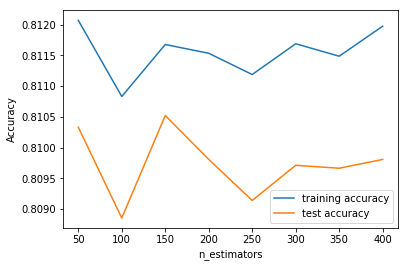

In [85]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [86]:
gc.collect()

2752

In [87]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(11, 152, 20)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(11, 152, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [88]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.132244,0.022180,0.004986,0.000632,11,{'n_estimators': 11},0.817900,0.814762,0.808333,0.801429,...,0.809476,0.006090,6,0.818918,0.815357,0.808988,0.811845,0.810249,0.813072,0.003621
1,0.380789,0.038210,0.012765,0.002780,31,{'n_estimators': 31},0.812664,0.813810,0.809286,0.805238,...,0.809429,0.003407,7,0.811953,0.811905,0.810357,0.812262,0.810190,0.811333,0.000876
2,0.909961,0.729393,0.016576,0.002416,51,{'n_estimators': 51},0.813378,0.813810,0.810238,0.808095,...,0.810762,0.002435,1,0.811536,0.811607,0.810893,0.813631,0.813880,0.812309,0.001209
3,0.825785,0.039277,0.022154,0.000746,71,{'n_estimators': 71},0.812188,0.813571,0.810952,0.803095,...,0.808952,0.004150,8,0.812251,0.810595,0.812500,0.810476,0.812630,0.811690,0.000951
4,1.057475,0.045114,0.036901,0.005388,91,{'n_estimators': 91},0.811235,0.813095,0.810952,0.805476,...,0.809857,0.002629,3,0.810227,0.810000,0.812857,0.812619,0.812987,0.811738,0.001334


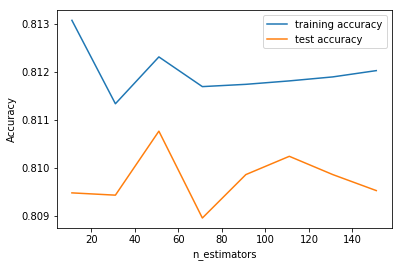

In [89]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [91]:
gc.collect()

2705

In [90]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(30, 63, 4)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(30, 63, 4)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [92]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.374212,0.033096,0.011364,0.001204,30,{'n_estimators': 30},0.810045,0.811429,0.809048,0.805952,...,0.809571,0.002016,8,0.810703,0.809583,0.812798,0.813274,0.813940,0.812059,0.001645
1,0.380776,0.016764,0.014164,0.001712,34,{'n_estimators': 34},0.815282,0.813333,0.806429,0.807143,...,0.809905,0.003660,3,0.817608,0.811310,0.813036,0.813690,0.812571,0.813643,0.002130
2,0.451598,0.035233,0.015153,0.002211,38,{'n_estimators': 38},0.811473,0.811667,0.810238,0.804524,...,0.809810,0.002688,5,0.811477,0.810714,0.810952,0.812321,0.815428,0.812179,0.001716
3,0.503056,0.024855,0.014360,0.001491,42,{'n_estimators': 42},0.811473,0.819048,0.810000,0.807381,...,0.810905,0.004432,1,0.808977,0.818155,0.812738,0.814107,0.811737,0.813143,0.003018
4,1.029458,0.568815,0.025722,0.017618,46,{'n_estimators': 46},0.809807,0.812143,0.810952,0.804762,...,0.809619,0.002547,7,0.809334,0.810179,0.811071,0.813393,0.815963,0.811988,0.002406


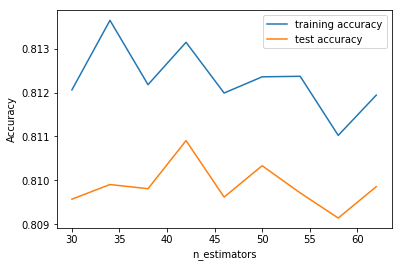

In [93]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [94]:
gc.collect()

2500

In [98]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(36, 47, 1)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(36, 47)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [99]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.398734,0.017082,0.011568,0.000799,36,{'n_estimators': 36},0.812188,0.814048,0.811905,0.807619,...,0.810762,0.002505,2,0.813501,0.809583,0.811726,0.813452,0.812868,0.812226,0.001468
1,0.454393,0.030985,0.012952,0.001793,37,{'n_estimators': 37},0.811711,0.814762,0.810714,0.804524,...,0.809333,0.003984,8,0.810941,0.812262,0.811905,0.812917,0.811261,0.811857,0.000705
2,0.455980,0.035611,0.013570,0.002337,38,{'n_estimators': 38},0.812426,0.813571,0.810000,0.806429,...,0.810286,0.002529,3,0.813739,0.810298,0.811429,0.812679,0.812511,0.812131,0.001173
3,0.466353,0.027037,0.014766,0.001706,39,{'n_estimators': 39},0.811950,0.813333,0.810000,0.805238,...,0.809381,0.003123,6,0.814156,0.811071,0.811964,0.811905,0.811380,0.812095,0.001082
4,0.495668,0.022679,0.016370,0.002660,40,{'n_estimators': 40},0.811950,0.810714,0.807619,0.805714,...,0.808190,0.002736,11,0.809751,0.809226,0.810774,0.812500,0.809238,0.810298,0.001237


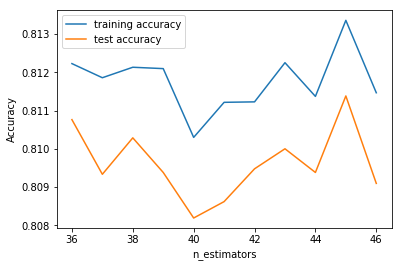

In [100]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


<hr>

### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [21]:
import gc
gc.collect()

2678

In [22]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [i for i in range(1,20,1)]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [23]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.050471,0.003357,0.004383,0.000492,1,{'max_features': 1},0.790526,0.791905,0.780476,0.781905,...,0.785143,0.004999,19,0.791297,0.792143,0.784345,0.785179,0.781084,0.786810,0.004245
1,0.072816,0.004155,0.004582,0.000810,2,{'max_features': 2},0.796239,0.801190,0.804286,0.794286,...,0.799333,0.003600,18,0.798500,0.798274,0.805357,0.802560,0.804000,0.801738,0.002877
2,0.114294,0.019446,0.005786,0.000749,3,{'max_features': 3},0.807665,0.807857,0.805952,0.809524,...,0.807714,0.001133,17,0.808084,0.807381,0.808929,0.814881,0.810130,0.809881,0.002663
3,0.121675,0.015359,0.005195,0.001178,4,{'max_features': 4},0.809331,0.811429,0.818571,0.812619,...,0.814000,0.003678,15,0.810167,0.809048,0.819881,0.818988,0.820844,0.815786,0.005091
4,0.154983,0.015809,0.004990,0.000644,5,{'max_features': 5},0.811473,0.810238,0.820000,0.817143,...,0.812810,0.005233,16,0.810584,0.806845,0.819643,0.821131,0.808940,0.813429,0.005823


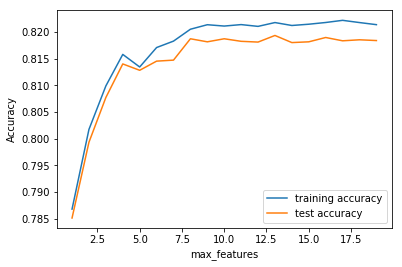

In [24]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Let's now check the optimum value for min samples leaf in our case.

In [47]:
import gc
gc.collect()

7200

In [48]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 401, 40)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(1, 401, 40)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [49]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.453378,0.030912,0.012373,0.000819,1,{'min_samples_leaf': 1},0.809093,0.807143,0.804762,0.794762,...,0.803476,0.005021,9,0.980892,0.980238,0.981845,0.980298,0.980477,0.980750,0.000593
1,0.634304,0.400026,0.019548,0.013418,41,{'min_samples_leaf': 41},0.813616,0.815476,0.820476,0.811190,...,0.814714,0.003194,1,0.821597,0.821964,0.823036,0.823929,0.822689,0.822643,0.000820
2,0.250921,0.013085,0.007581,0.001017,81,{'min_samples_leaf': 81},0.812664,0.818095,0.817857,0.810952,...,0.813571,0.003858,2,0.816001,0.815060,0.819524,0.820536,0.815725,0.817369,0.002217
3,0.255728,0.015289,0.007774,0.001167,121,{'min_samples_leaf': 121},0.815996,0.810238,0.812857,0.810238,...,0.812095,0.002173,3,0.818442,0.811548,0.812440,0.818214,0.819713,0.816071,0.003380
4,0.221005,0.030783,0.008582,0.001613,161,{'min_samples_leaf': 161},0.810997,0.807857,0.808571,0.804286,...,0.806619,0.003388,7,0.813560,0.808333,0.807738,0.811071,0.806797,0.809500,0.002479


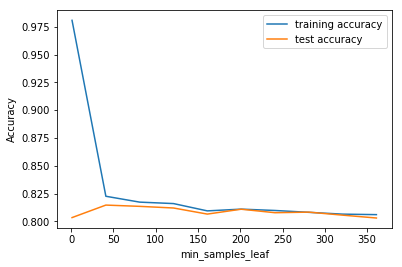

In [50]:
%matplotlib inline
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [51]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(25, 226, 25)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(25, 226, 25)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [52]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.282849,0.014356,0.007381,0.000488,25,{'min_samples_leaf': 25},0.817424,0.816905,0.816905,0.812857,...,0.814714,0.003092,2,0.827966,0.828631,0.827500,0.829226,0.826498,0.827964,0.000938
1,0.253316,0.037595,0.007979,0.001093,50,{'min_samples_leaf': 50},0.816472,0.822619,0.818095,0.810000,...,0.815714,0.004590,1,0.822489,0.820238,0.821726,0.820536,0.821499,0.821298,0.000818
2,0.247339,0.019524,0.006794,0.000390,75,{'min_samples_leaf': 75},0.811473,0.810714,0.813333,0.812381,...,0.812524,0.001405,5,0.817370,0.815298,0.814048,0.819762,0.820606,0.817417,0.002511
3,0.218216,0.009237,0.007381,0.001353,100,{'min_samples_leaf': 100},0.815520,0.810000,0.817857,0.808571,...,0.812857,0.003432,4,0.818739,0.811071,0.819464,0.818810,0.817213,0.817060,0.003084
4,0.241364,0.036488,0.007973,0.001240,125,{'min_samples_leaf': 125},0.813854,0.812143,0.815000,0.813095,...,0.811286,0.004572,7,0.816656,0.813095,0.813095,0.818869,0.807809,0.813905,0.003760


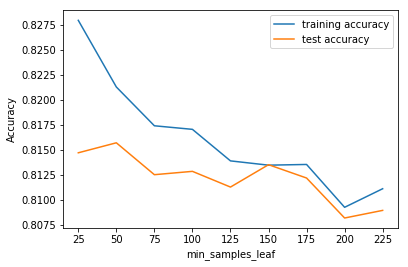

In [53]:

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [57]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(20, 32, 1)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(20, 32)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [58]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.297604,0.011115,0.007986,0.000621,20,{'min_samples_leaf': 20},0.815520,0.817619,0.813810,0.813333,...,0.814286,0.002174,10,0.832371,0.834167,0.831190,0.831964,0.831915,0.832321,0.000998
1,0.293823,0.018955,0.008375,0.001013,21,{'min_samples_leaf': 21},0.810283,0.819048,0.816667,0.815238,...,0.815333,0.002867,4,0.832550,0.831845,0.830000,0.834524,0.832153,0.832214,0.001448
2,0.289033,0.012606,0.008587,0.001197,22,{'min_samples_leaf': 22},0.816948,0.815952,0.817381,0.812381,...,0.816190,0.002048,2,0.830466,0.830119,0.831012,0.833214,0.831677,0.831298,0.001094
3,0.298668,0.022931,0.008971,0.000899,23,{'min_samples_leaf': 23},0.816948,0.814524,0.820476,0.807857,...,0.814810,0.004133,7,0.830942,0.830179,0.827917,0.833631,0.830605,0.830655,0.001826
4,0.317970,0.034276,0.009561,0.001626,24,{'min_samples_leaf': 24},0.816948,0.818810,0.816190,0.808810,...,0.814810,0.003487,7,0.831538,0.831369,0.829405,0.829524,0.831141,0.830595,0.000933


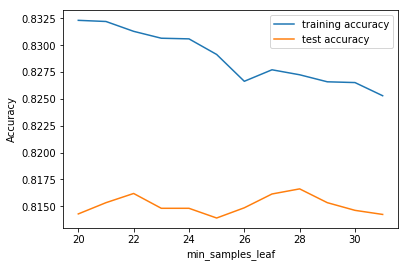

In [59]:

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that the model starts of overfit as you decrease the value of min_samples_leaf. 

### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [32]:
import gc
gc.collect()

5398

In [36]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 501, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(100, 501, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [37]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.342683,0.022785,0.009768,0.002037,100,{'min_samples_split': 100},0.817424,0.816190,0.816667,0.813810,...,0.815810,0.001282,6,0.831657,0.832500,0.832202,0.832560,0.831498,0.832083,0.000433
1,0.357459,0.044218,0.008377,0.001735,150,{'min_samples_split': 150},0.814806,0.819762,0.821667,0.811190,...,0.817000,0.003696,3,0.824751,0.827143,0.826190,0.827798,0.828046,0.826786,0.001203
2,0.286243,0.011064,0.007173,0.000403,200,{'min_samples_split': 200},0.816948,0.821905,0.821905,0.815714,...,0.818095,0.003248,1,0.824037,0.823988,0.824524,0.825298,0.823641,0.824298,0.000574
3,0.278259,0.007029,0.006770,0.000393,250,{'min_samples_split': 250},0.814330,0.819286,0.814524,0.812857,...,0.815286,0.002164,8,0.820227,0.821310,0.819702,0.822738,0.822332,0.821262,0.001169
4,0.262121,0.005659,0.006573,0.000495,300,{'min_samples_split': 300},0.816234,0.820238,0.818810,0.816429,...,0.817952,0.001500,2,0.821775,0.820536,0.817798,0.822738,0.821677,0.820905,0.001703


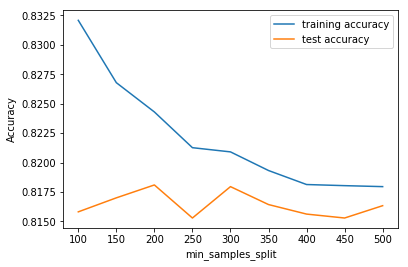

In [38]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [60]:
gc.collect()

10982

In [61]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(125, 326, 25)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(125, 326, 25)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [62]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.318947,0.017035,0.008180,0.001163,125,{'min_samples_split': 125},0.817900,0.817143,0.821667,0.815000,...,0.817476,0.002334,3,0.827549,0.830179,0.827083,0.830595,0.828701,0.828821,0.001389
1,0.304783,0.022160,0.007779,0.000746,150,{'min_samples_split': 150},0.816472,0.820952,0.821667,0.814048,...,0.817905,0.002922,1,0.825704,0.827143,0.825833,0.829524,0.826617,0.826964,0.001384
2,0.321545,0.020466,0.007382,0.000503,175,{'min_samples_split': 175},0.813854,0.819524,0.818810,0.815000,...,0.816952,0.002185,4,0.826121,0.824643,0.824940,0.826429,0.824237,0.825274,0.000853
3,0.305191,0.021773,0.008379,0.001214,200,{'min_samples_split': 200},0.815996,0.817619,0.819524,0.813095,...,0.816429,0.002124,6,0.823620,0.822202,0.824167,0.824881,0.823701,0.823714,0.000879
4,0.317342,0.019415,0.007182,0.001174,225,{'min_samples_split': 225},0.815282,0.819762,0.816905,0.810714,...,0.815667,0.002932,9,0.822787,0.824405,0.821131,0.823155,0.822808,0.822857,0.001046


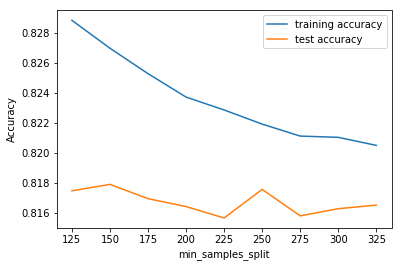

In [63]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [67]:
gc.collect()

5391

In [68]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(120, 261, 10)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, 
                  parameters, 
                  cv=n_folds, 
                  scoring="accuracy")

rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(120, 261, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [69]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.425269,0.025527,0.010566,0.000484,120,{'min_samples_split': 120},0.814806,0.818810,0.818333,0.815476,...,0.816143,0.002111,14,0.832192,0.830536,0.829821,0.832440,0.827629,0.830524,0.001751
1,0.414107,0.021120,0.010769,0.001461,130,{'min_samples_split': 130},0.812426,0.819048,0.820000,0.812381,...,0.815571,0.003293,15,0.828264,0.828690,0.828274,0.828512,0.827391,0.828226,0.000447
2,0.425476,0.023283,0.009574,0.000488,140,{'min_samples_split': 140},0.818615,0.816429,0.816667,0.815000,...,0.816857,0.001206,10,0.827966,0.825595,0.827024,0.830179,0.826558,0.827464,0.001557
3,0.410109,0.021318,0.009981,0.001091,150,{'min_samples_split': 150},0.816472,0.823333,0.819762,0.815238,...,0.817762,0.003382,3,0.826478,0.827143,0.824286,0.829345,0.823225,0.826095,0.002160
4,0.452589,0.067684,0.011189,0.001592,160,{'min_samples_split': 160},0.816472,0.819286,0.820476,0.814286,...,0.817095,0.002412,9,0.828085,0.825714,0.826429,0.825655,0.824177,0.826012,0.001269


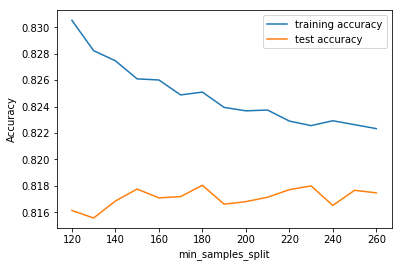

In [70]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [71]:
gc.collect()

2767

In [72]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(120, 231, 10)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, 
                  parameters, 
                  cv=n_folds, 
                  scoring="accuracy")

rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(120, 231, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [73]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.323547,0.013003,0.007584,0.000491,120,{'min_samples_split': 120},0.817186,0.817143,0.821429,0.809524,...,0.816476,0.003852,10,0.830168,0.830595,0.828155,0.830536,0.830724,0.830036,0.000958
1,0.422471,0.056278,0.009979,0.001093,130,{'min_samples_split': 130},0.818139,0.821190,0.819762,0.815714,...,0.818238,0.002042,2,0.830288,0.828750,0.826071,0.828988,0.830129,0.828845,0.001513
2,0.468754,0.025021,0.011573,0.001346,140,{'min_samples_split': 140},0.818615,0.820952,0.816429,0.813571,...,0.816476,0.003049,10,0.826121,0.829345,0.828393,0.830000,0.826856,0.828143,0.001463
3,0.469543,0.035722,0.011768,0.001596,150,{'min_samples_split': 150},0.819329,0.817381,0.821667,0.817619,...,0.818190,0.002228,3,0.826537,0.827976,0.824881,0.826310,0.824058,0.825952,0.001364
4,0.345119,0.036974,0.009368,0.001852,160,{'min_samples_split': 160},0.815758,0.821667,0.821429,0.814762,...,0.817381,0.003492,8,0.826240,0.825595,0.825476,0.825417,0.826915,0.825929,0.000574


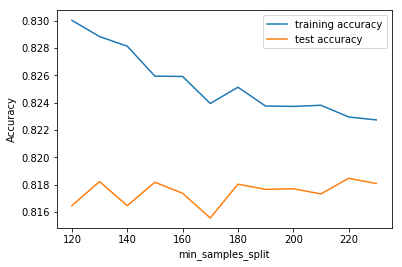

In [74]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [78]:
gc.collect()

5465

In [79]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(216, 225, 1)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, 
                  parameters, 
                  cv=n_folds, 
                  scoring="accuracy")

rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(216, 225)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [80]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.282661,0.024541,0.006572,0.001201,216,{'min_samples_split': 216},0.817424,0.822143,0.815238,0.813571,...,0.817238,0.002894,6,0.823382,0.824702,0.822143,0.823988,0.825248,0.823893,0.001079
1,0.311759,0.025530,0.007972,0.001548,217,{'min_samples_split': 217},0.815520,0.820000,0.819762,0.816429,...,0.817429,0.002034,5,0.823025,0.823452,0.823036,0.823750,0.822094,0.823071,0.000559
2,0.289633,0.026131,0.006577,0.000803,218,{'min_samples_split': 218},0.816948,0.822143,0.819524,0.816190,...,0.817952,0.002574,2,0.822251,0.822560,0.824762,0.824464,0.822570,0.823321,0.001065
3,0.290815,0.023406,0.008181,0.002132,219,{'min_samples_split': 219},0.813616,0.818810,0.815476,0.811905,...,0.815524,0.002560,8,0.821001,0.822976,0.820060,0.824167,0.823225,0.822286,0.001517
4,0.311565,0.032778,0.007182,0.000398,220,{'min_samples_split': 220},0.809569,0.820952,0.819762,0.811190,...,0.815190,0.004521,9,0.819989,0.822440,0.822738,0.822917,0.823701,0.822357,0.001255


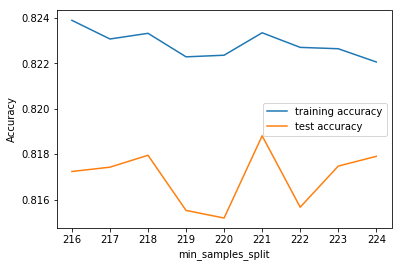

In [81]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<hr>

## Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.

In [101]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [i for i in range(3,10,1)],
    'min_samples_leaf': range(20, 32, 1),
    'min_samples_split': [220,221,222],
    'n_estimators': [43,45,47], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [102]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1512 candidates, totalling 4536 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 4536 out of 4536 | elapsed: 17.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': range(20, 32), 'min_samples_split': [220, 221, 222], 'n_estimators': [43, 45, 47], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [103]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8199047619047619 using {'max_depth': 8, 'max_features': 5, 'min_samples_leaf': 26, 'min_samples_split': 222, 'n_estimators': 43}


**Fitting the final model with the best parameters obtained from grid search.**

In [104]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=26, 
                             min_samples_split=222,
                             max_features=5,
                             n_estimators=43)

In [105]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=26, min_samples_split=222,
            min_weight_fraction_leaf=0.0, n_estimators=43, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [106]:
# predict
predictions = rfc.predict(X_test)

In [107]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [108]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.34      0.46      1942

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.77      0.65      0.68      9000
weighted avg       0.81      0.82      0.80      9000



In [109]:
print(confusion_matrix(y_test,predictions))

[[6756  302]
 [1273  669]]


In [110]:
(6756+669)/(6756+669+302+1273)

0.825

In [150]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=26, 
                             min_samples_split=222,
                             max_features=10,
                             n_estimators=43)

In [151]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=26, min_samples_split=222,
            min_weight_fraction_leaf=0.0, n_estimators=43, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [152]:
# predict
predictions = rfc.predict(X_test)

In [153]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [154]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.70      0.36      0.47      1942

   micro avg       0.83      0.83      0.83      9000
   macro avg       0.77      0.66      0.68      9000
weighted avg       0.81      0.83      0.81      9000



In [155]:
print(confusion_matrix(y_test,predictions))

[[6757  301]
 [1251  691]]


In [156]:
(6757+691)/(6757+691+301+1251)

0.8275555555555556

<hr><hr>

## CASE STUDY 2

### AdaBoost Algorithm for Cancer Prediction

In this lab, you’ll explore the breast cancer dataset and try to train the model to predict if the person is having breast cancer or not. We will start off with a weak learner, a decision tree with maximum depth = 2.

We will then build an adaboost ensemble with 50 trees with a step of 3 and compare the performance with the weak learner.

Let's get started by loading the libraries.

In [158]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn import metrics
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')


We will use the breast cancer dataset in which the target variable has 1 if the person has cancer and 0 otherwise. Let's load the data.

In [159]:
cancer = load_breast_cancer()
digits = load_digits()

data = cancer

In [161]:
df = pd.DataFrame(data = np.c_[data['data'], data['target']],
                     columns= list(data['feature_names']) + ['target'])
df['target'] = df['target'].astype('uint16')

In [162]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,0


In [163]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [165]:
# adaboost experiments
# create x and y train
X = df.drop('target', axis=1)
y = df[['target']]

# split data into train and test/validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455, 1)
(114, 30)
(114, 1)


In [166]:
# check the average cancer occurence rates in train and test data, should be comparable
print(y_train.mean())
print(y_test.mean())

target    0.626374
dtype: float64
target    0.631579
dtype: float64


In [167]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

In [168]:
# fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.9385964912280702

Now, we will see the accuracy using the AdaBoost algorithm. In this following code, we will write code to calculate the accuracy of the AdaBoost models as we increase the number of trees from 1 to 50 with a step of 3 in the lines:

'estimators = list(range(1, 50, 3))'

'for n_est in estimators:'

We finally end up with the accuracy of all the models in a single list abc_scores.

In [171]:
estimators = list(range(2, 201, 2))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)

In [172]:
abc_scores

[0.9473684210526315,
 0.9298245614035088,
 0.9473684210526315,
 0.9385964912280702,
 0.9385964912280702,
 0.9649122807017544,
 0.9385964912280702,
 0.9473684210526315,
 0.956140350877193,
 0.9649122807017544,
 0.956140350877193,
 0.956140350877193,
 0.9473684210526315,
 0.956140350877193,
 0.9649122807017544,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9912280701754386,
 0.9649122807017544,
 0.9736842105263158,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9912280701754386,
 0.9912280701754386,
 0.9912280701754386,
 0.9649122807017544,
 0.9736842105263158,
 0.9736842105263158,
 0.9912280701754386,
 0.9912280701754386,
 0.9736842105263158,
 0.9912280701754386,
 0.9912280701754386,
 0.9736842105263158,
 0.9912280701754386,
 0.9912280701754386,
 0.99122807017543

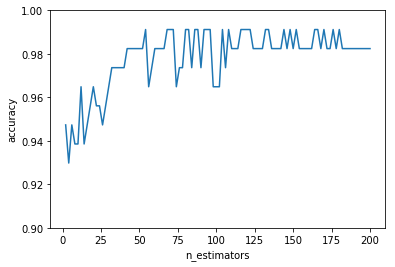

In [173]:
# plot test scores and n_estimators
# plot
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.90000, 1])
plt.show()

In [174]:
estimators = list(range(1, 75, 1))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)

In [175]:
abc_scores

[0.9473684210526315,
 0.9385964912280702,
 0.956140350877193,
 0.956140350877193,
 0.9736842105263158,
 0.9736842105263158,
 0.9473684210526315,
 0.9912280701754386,
 0.956140350877193,
 0.9736842105263158,
 0.9736842105263158,
 0.9649122807017544,
 0.9649122807017544,
 0.9385964912280702,
 0.9473684210526315,
 0.956140350877193,
 0.956140350877193,
 0.9473684210526315,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.9473684210526315,
 0.9649122807017544,
 0.956140350877193,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9649122807017544,
 0.9736842105263158,
 0.9649122807017544,
 0.9736842105263158,
 0.9824561403508771,
 0.9824561403508771,
 0.9649122807017544,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9824561403508771,
 0.9912280701754386,
 

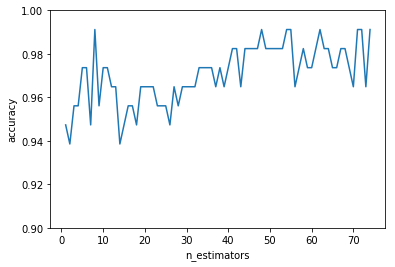

In [176]:
# plot test scores and n_estimators
# plot
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.90000, 1])
plt.show()

<hr><hr>

## CASE STUDY 3

## TalkingData: Fraudulent Click Prediction

In this notebook, we will apply various boosting algorithms to solve an interesting classification problem from the domain of 'digital fraud'.

The analysis is divided into the following sections:
- Understanding the business problem
- Understanding and exploring the data
- Feature engineering: Creating new features
- Model building and evaluation: AdaBoost
- Modelling building and evaluation: Gradient Boosting
- Modelling building and evaluation: XGBoost


### Understanding the Business Problem

<a href="https://www.talkingdata.com/">TalkingData</a> is a Chinese big data company, and one of their areas of expertise is mobile advertisements.

In mobile advertisements, **click fraud** is a major source of losses. Click fraud is the practice of repeatedly clicking on an advertisement hosted on a website with the intention of generating revenue for the host website or draining revenue from the advertiser.

In this case, TalkingData happens to be serving the advertisers (their clients). TalkingData cover a whopping **approx. 70% of the active mobile devices in China**, of which 90% are potentially fraudulent (i.e. the user is actually not going to download the app after clicking).

You can imagine the amount of money they can help clients save if they are able to predict whether a given click is fraudulent (or equivalently, whether a given click will result in a download). 

Their current approach to solve this problem is that they've generated a blacklist of IP addresses - those IPs which produce lots of clicks, but never install any apps. Now, they want to try some advanced techniques to predict the probability of a click being genuine/fraud.

In this problem, we will use the features associated with clicks, such as IP address, operating system, device type, time of click etc. to predict the probability of a click being fraud.

They have released <a href="https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection">the problem on Kaggle here.</a>.

### Understanding and Exploring the Data

The data contains observations of about 240 million clicks, and whether a given click resulted in a download or not (1/0). 

On Kaggle, the data is split into train.csv and train_sample.csv (100,000 observations). We'll use the smaller train_sample.csv in this notebook for speed, though while training the model for Kaggle submissions, the full training data will obviously produce better results.

The detailed data dictionary is mentioned here:
- ```ip```: ip address of click.
- ```app```: app id for marketing.
- ```device```: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
- ```os```: os version id of user mobile phone
- ```channel```: channel id of mobile ad publisher
- ```click_time```: timestamp of click (UTC)
- ```attributed_time```: if user download the app for after clicking an ad, this is the time of the app download
- ```is_attributed```: the target that is to be predicted, indicating the app was downloaded

Let's try finding some useful trends in the data.

In [1]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

##### Reading the Data  

The code below reads the train_sample.csv file if you set testing = True, else reads the full train.csv file. You can read the sample while tuning the model etc., and then run the model on the full data once done.

##### Important Note: Save memory when the data is huge

Since the training data is quite huge, the program will be quite slow if you don't consciously follow some best practices to save memory. This notebook demonstrates some of those practices. 

In [2]:
# reading training data

# specify column dtypes to save memory (by default pandas reads some columns as floats)
dtypes = {
        'ip'            : 'uint16',
        'app'           : 'uint16',
        'device'        : 'uint16',
        'os'            : 'uint16',
        'channel'       : 'uint16',
        'is_attributed' : 'uint8',
        'click_id'      : 'uint32' # note that click_id is only in test data, not training data
        }

# read training_sample.csv for quick testing/debug, else read the full train.csv
testing = True
if testing:
    train_path = "Datasets/train_sample.csv"
    skiprows = None
    nrows = None
    colnames=['ip','app','device','os', 'channel', 'click_time', 'is_attributed']
else:
    train_path = "Datasets/train.csv"
    skiprows = range(1, 144903891)
    nrows = 10000000
    colnames=['ip','app','device','os', 'channel', 'click_time', 'is_attributed']

# read training data
train_sample = pd.read_csv(train_path, skiprows=skiprows, nrows=nrows, dtype=dtypes, usecols=colnames)


In [3]:
# length of training data
len(train_sample.index)

100000

In [4]:
# Displays memory consumed by each column ---
print(train_sample.memory_usage())

Index                80
ip               200000
app              200000
device           200000
os               200000
channel          200000
click_time       800000
is_attributed    100000
dtype: int64


In [5]:
# space used by training data
print('Training dataset uses {0} MB'.format(train_sample.memory_usage().sum()/1024**2))

Training dataset uses 1.8120574951171875 MB


In [6]:
# training data top rows
train_sample.head()

,ip,app,device,os,channel,click_time,is_attributed
0,22004,12,1,13,497,2017-11-07 09:30:38,0
1,40024,25,1,17,259,2017-11-07 13:40:27,0
2,35888,12,1,19,212,2017-11-07 18:05:24,0
3,29048,13,1,13,477,2017-11-07 04:58:08,0
4,2877,12,1,1,178,2017-11-09 09:00:09,0


#### Exploring the Data - Univariate Analysis


Let's now understand and explore the data. Let's start with understanding the size and data types of the train_sample data.

In [7]:
# look at non-null values, number of entries etc.
# there are no missing values
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
ip               100000 non-null uint16
app              100000 non-null uint16
device           100000 non-null uint16
os               100000 non-null uint16
channel          100000 non-null uint16
click_time       100000 non-null object
is_attributed    100000 non-null uint8
dtypes: object(1), uint16(5), uint8(1)
memory usage: 1.8+ MB


In [8]:
# Basic exploratory analysis 

# Number of unique values in each column
def fraction_unique(x):
    return len(train_sample[x].unique())

number_unique_vals = {x: fraction_unique(x) for x in train_sample.columns}
number_unique_vals

{'ip': 28470,
 'app': 161,
 'device': 100,
 'os': 130,
 'channel': 161,
 'click_time': 80350,
 'is_attributed': 2}

In [9]:
# All columns apart from click time are originally int type, 
# though note that they are all actually categorical 
train_sample.dtypes

ip               uint16
app              uint16
device           uint16
os               uint16
channel          uint16
click_time       object
is_attributed     uint8
dtype: object

There are certain 'apps' which have quite high number of instances/rows (each row is a click). The plot below shows this. 

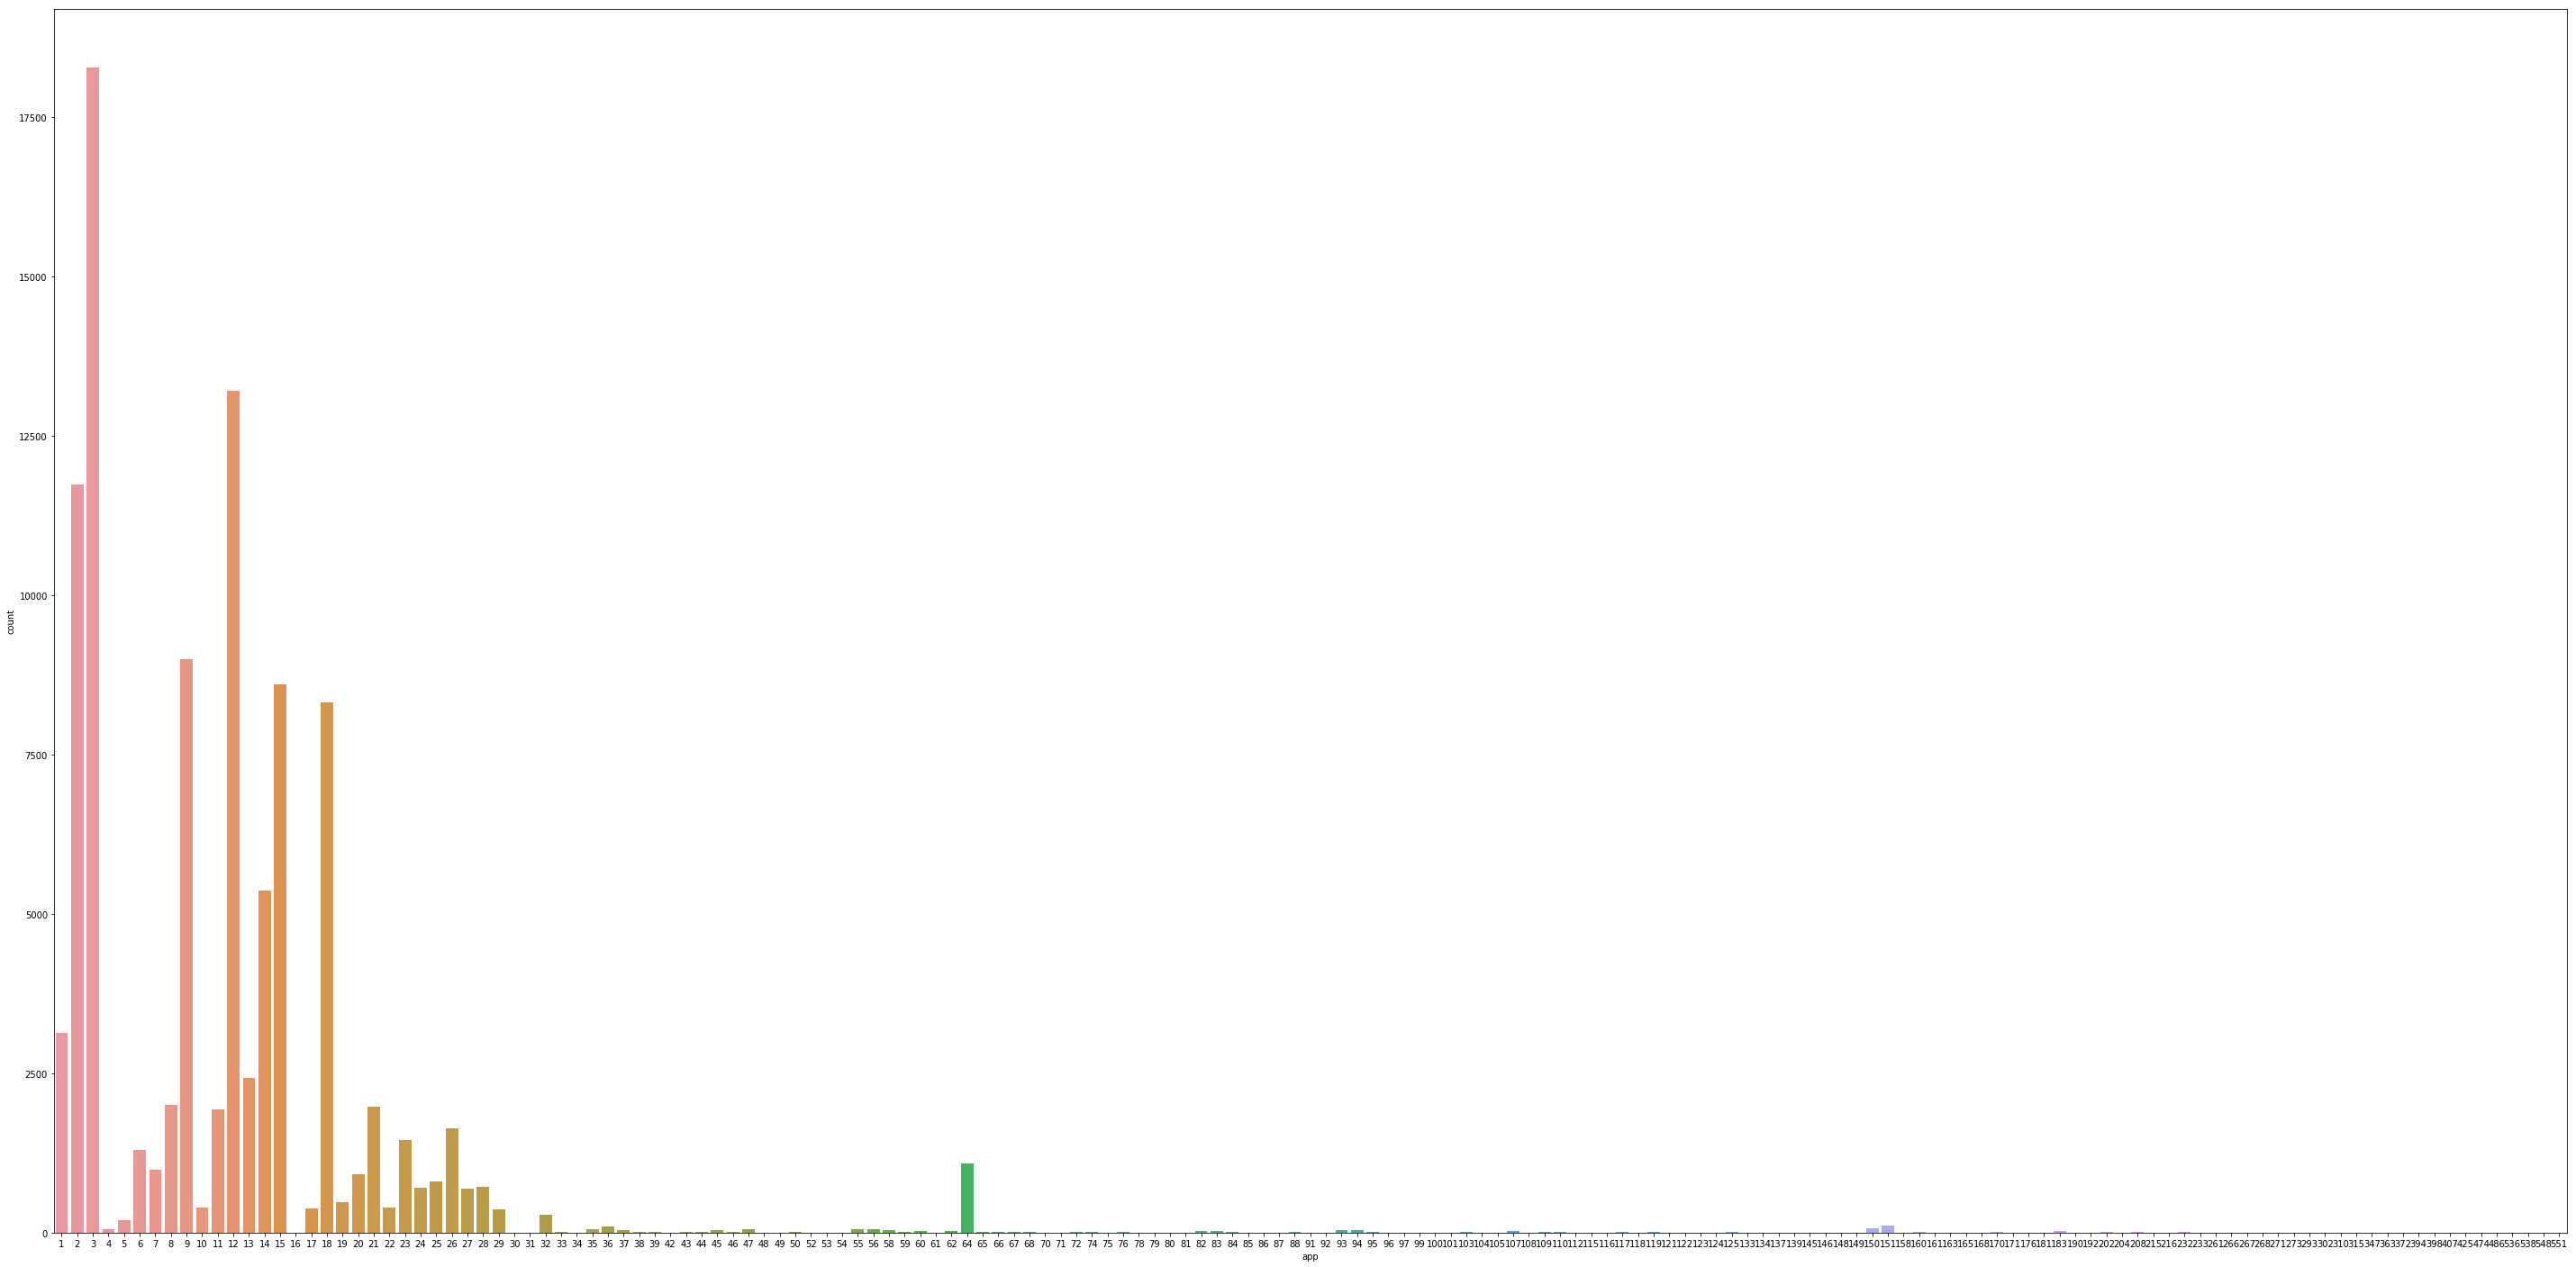

In [10]:
# # distribution of 'app' 
# # some 'apps' have a disproportionately high number of clicks (>15k), and some are very rare (3-4)
plt.figure(figsize=(50, 25))
sns.countplot(x="app", data=train_sample)

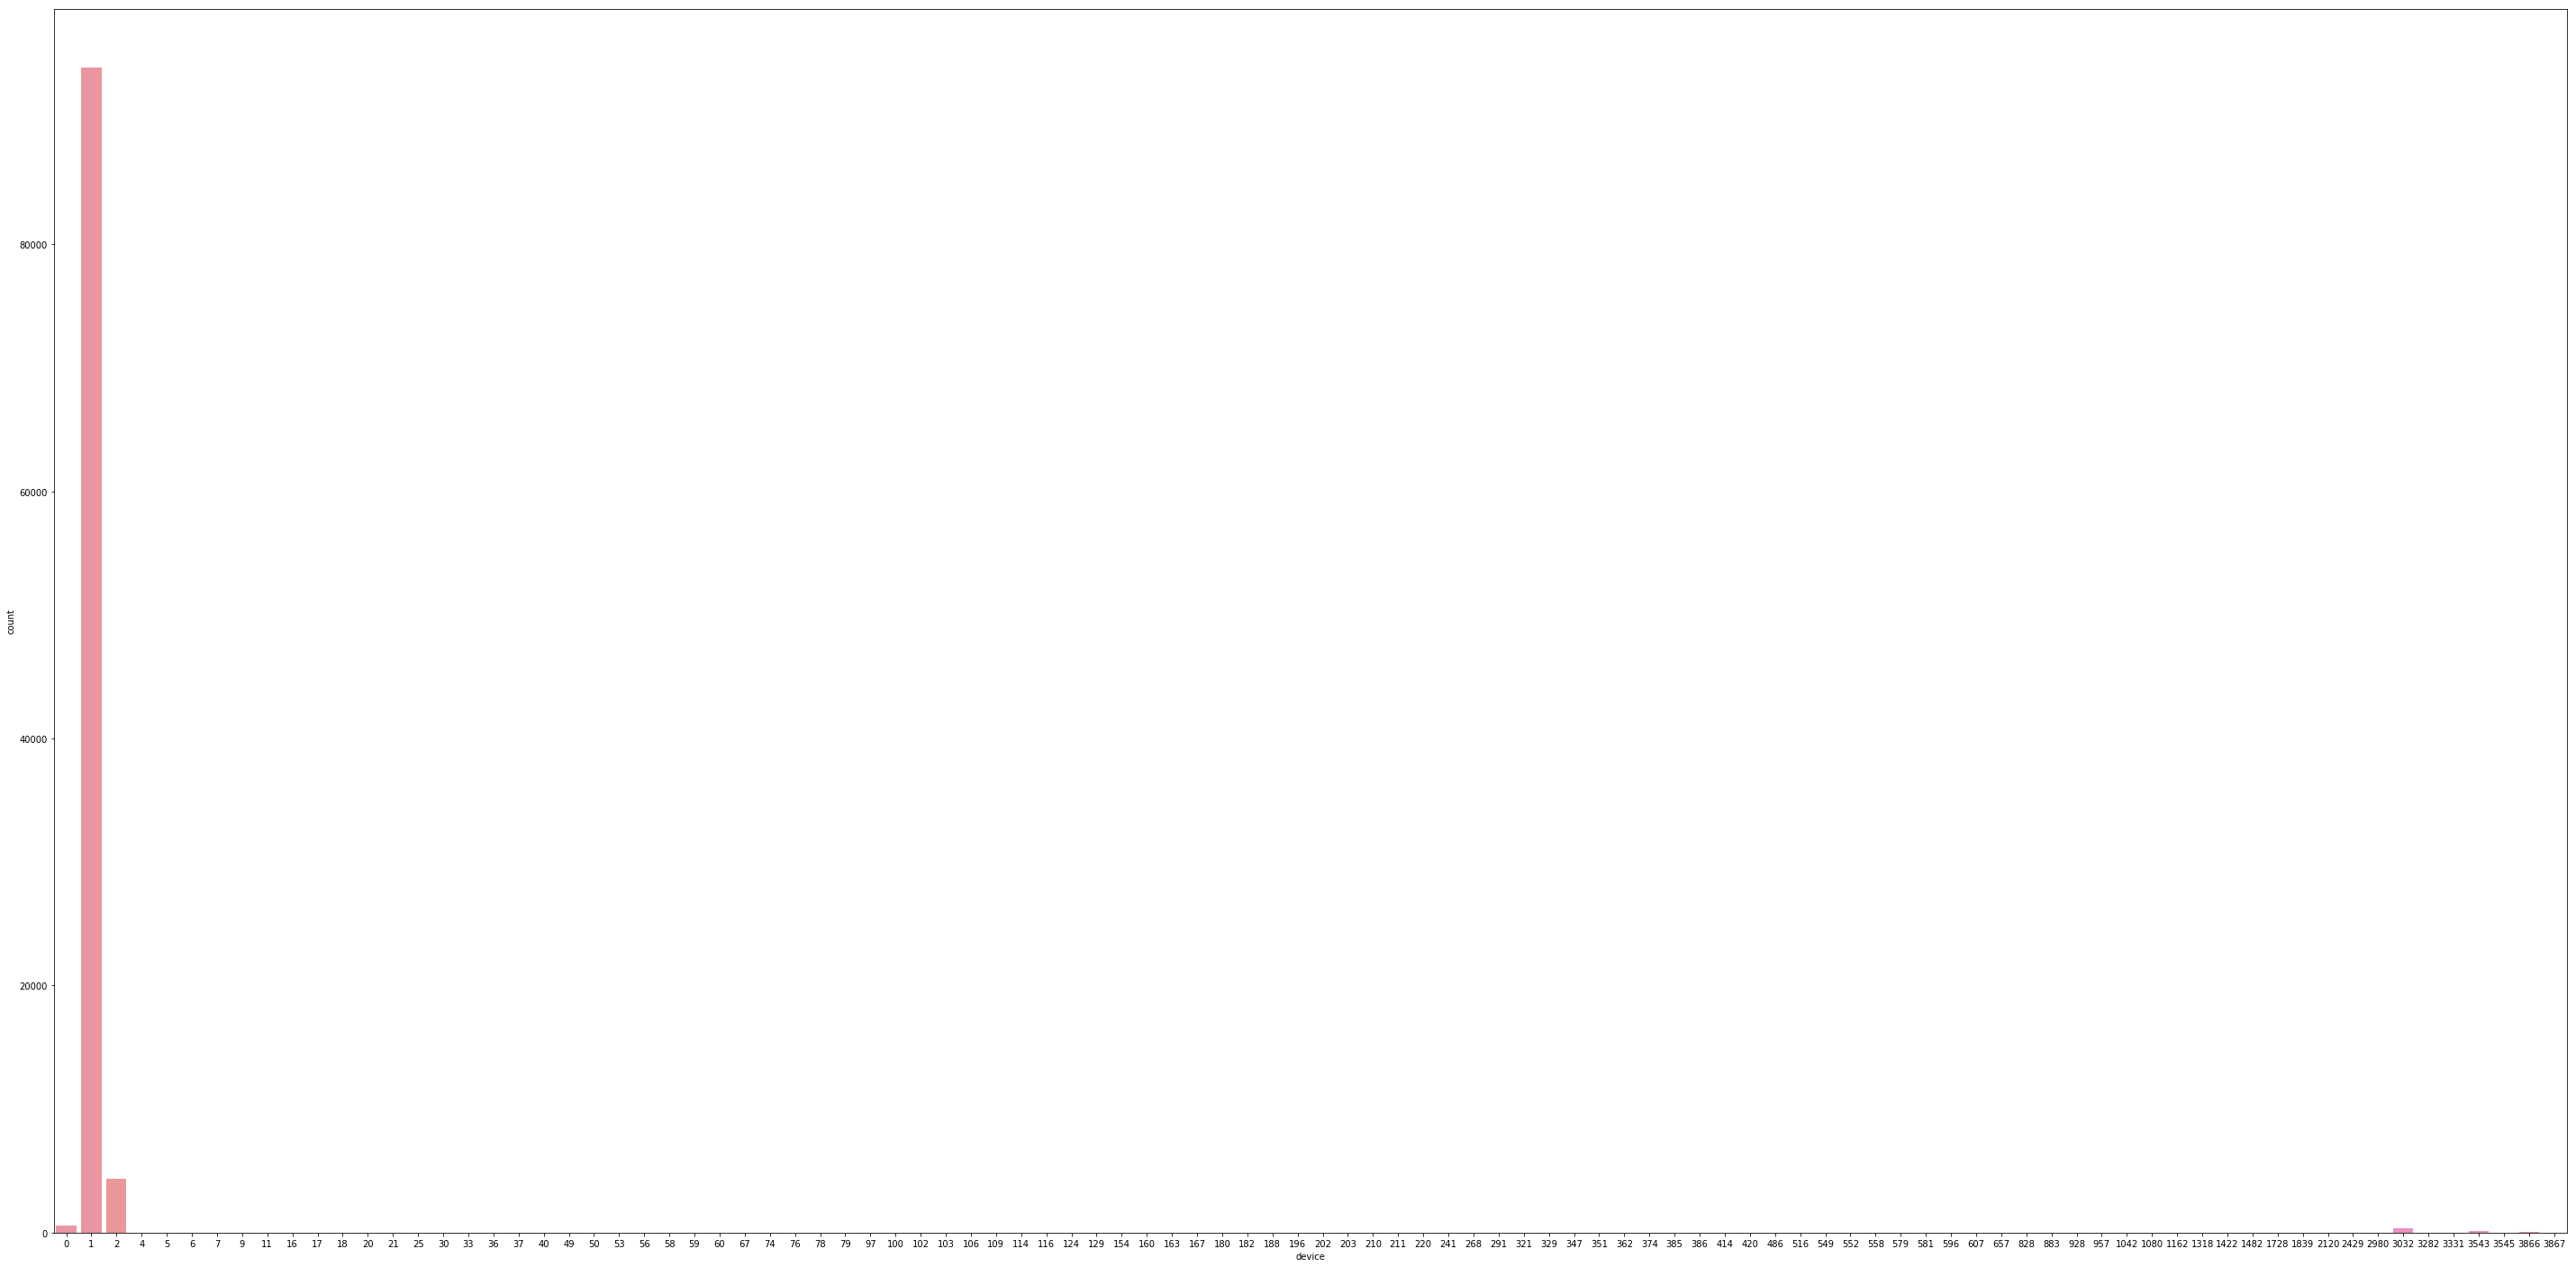

In [11]:
# # distribution of 'device' 
# # this is expected because a few popular devices are used heavily
plt.figure(figsize=(50, 25))
sns.countplot(x="device", data=train_sample)

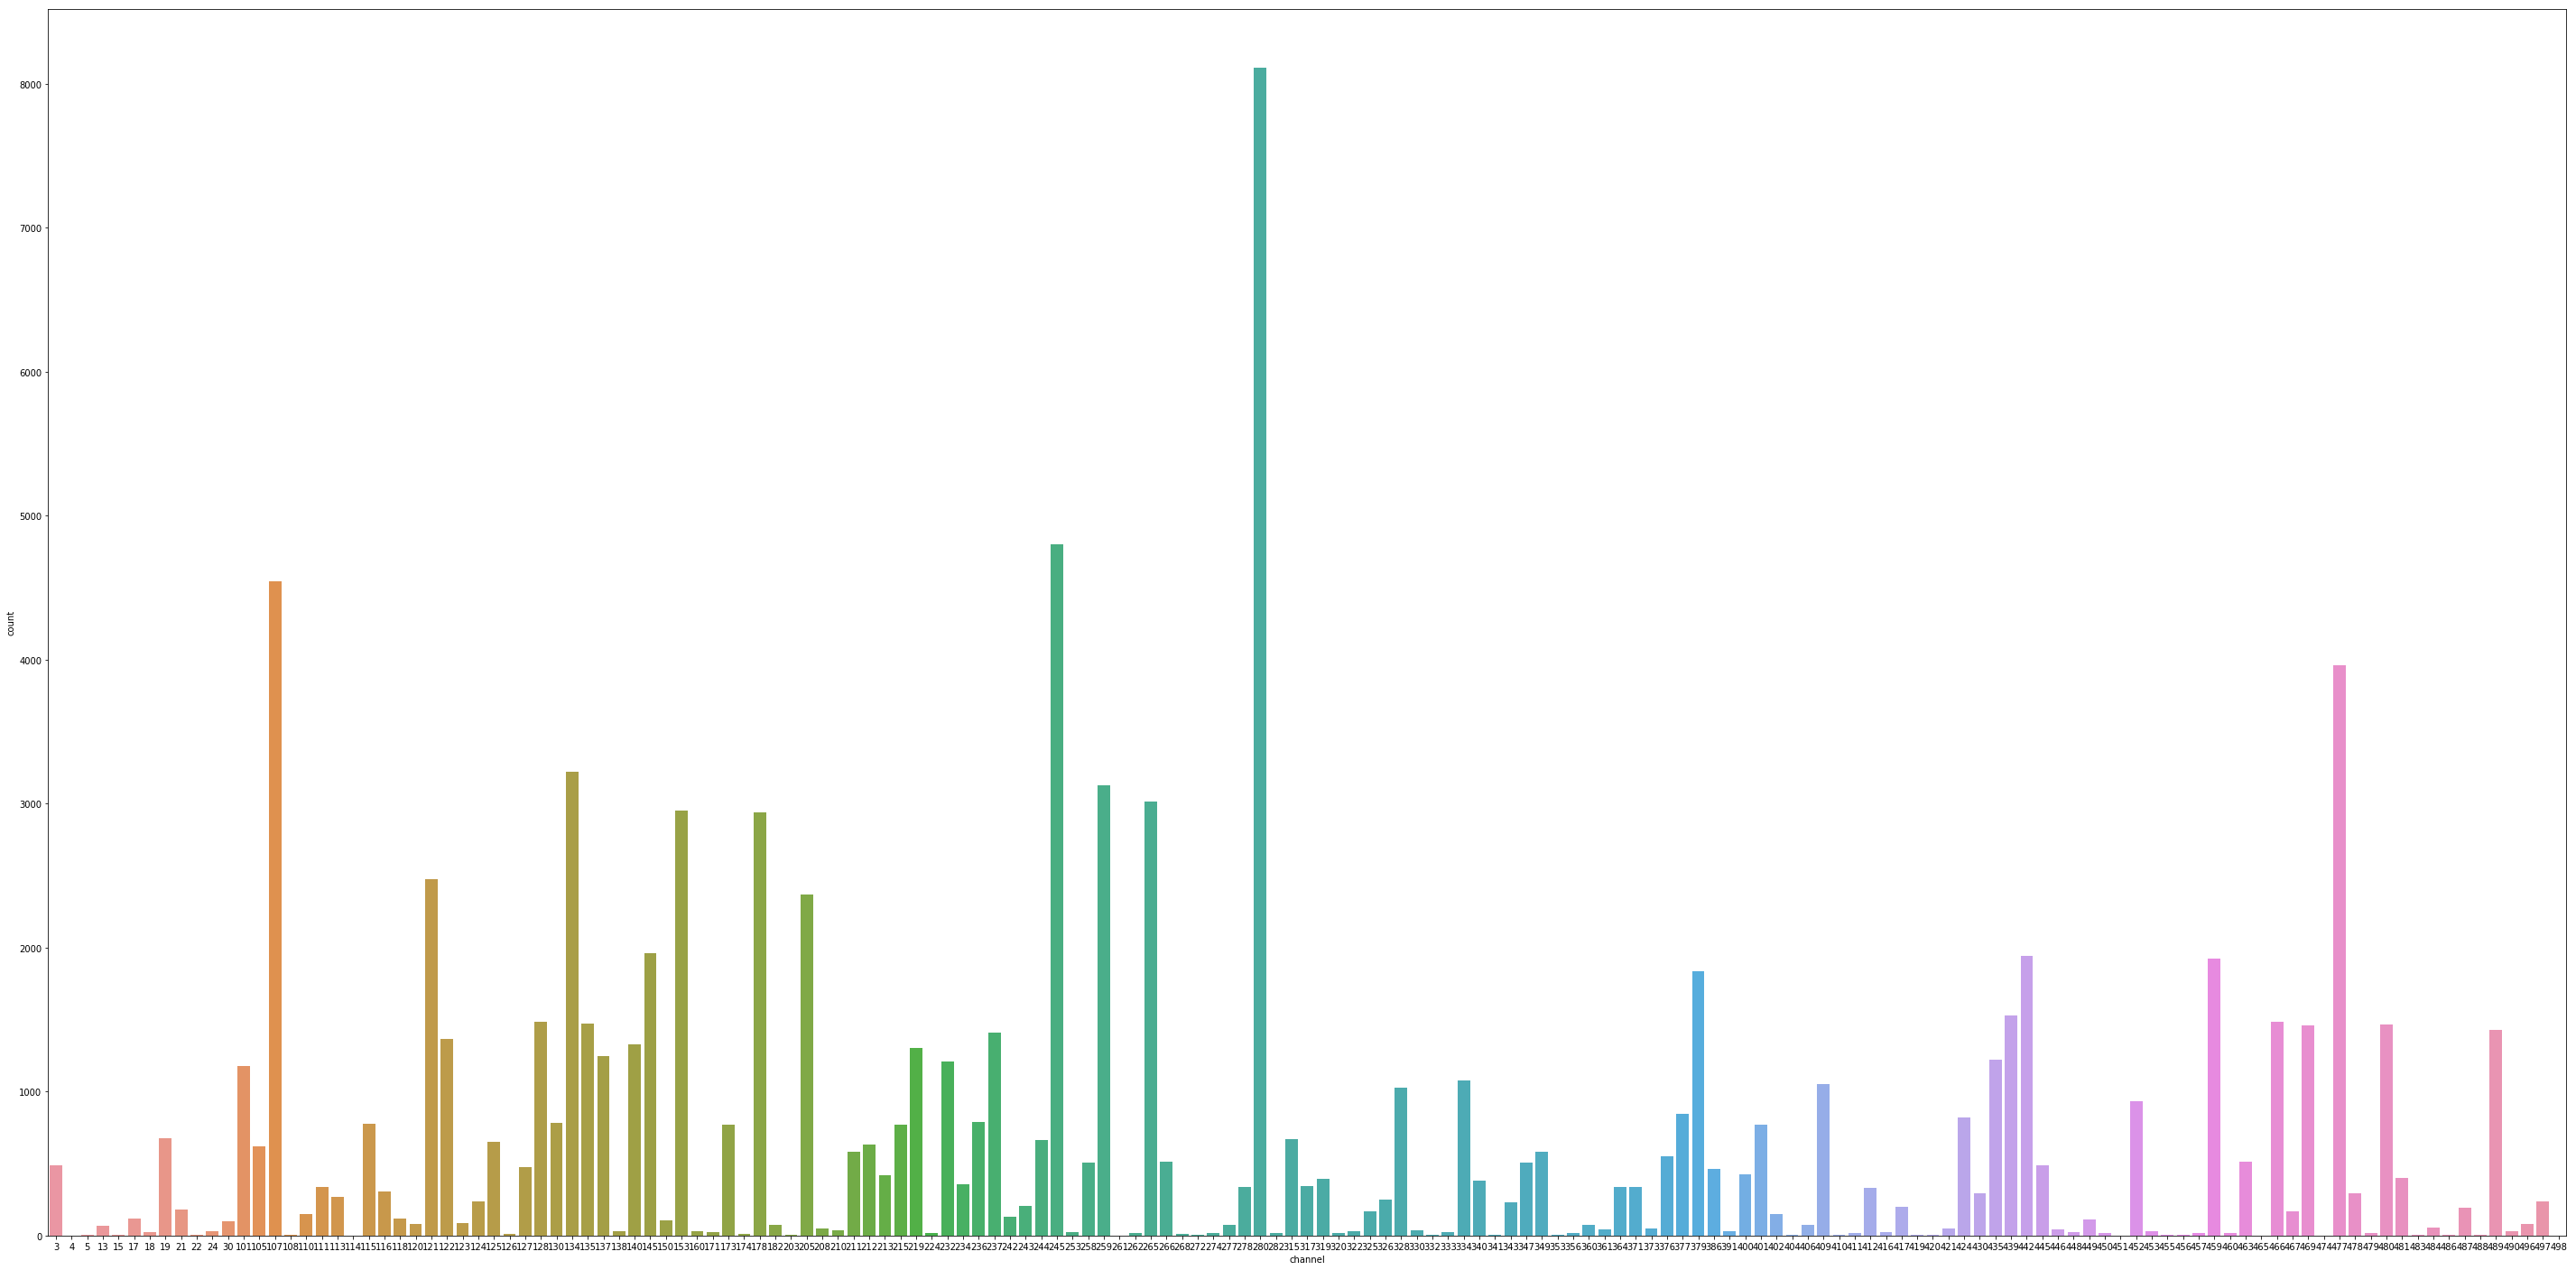

In [12]:
# # channel: various channels get clicks in comparable quantities
plt.figure(figsize=(50, 25))
sns.countplot(x="channel", data=train_sample)

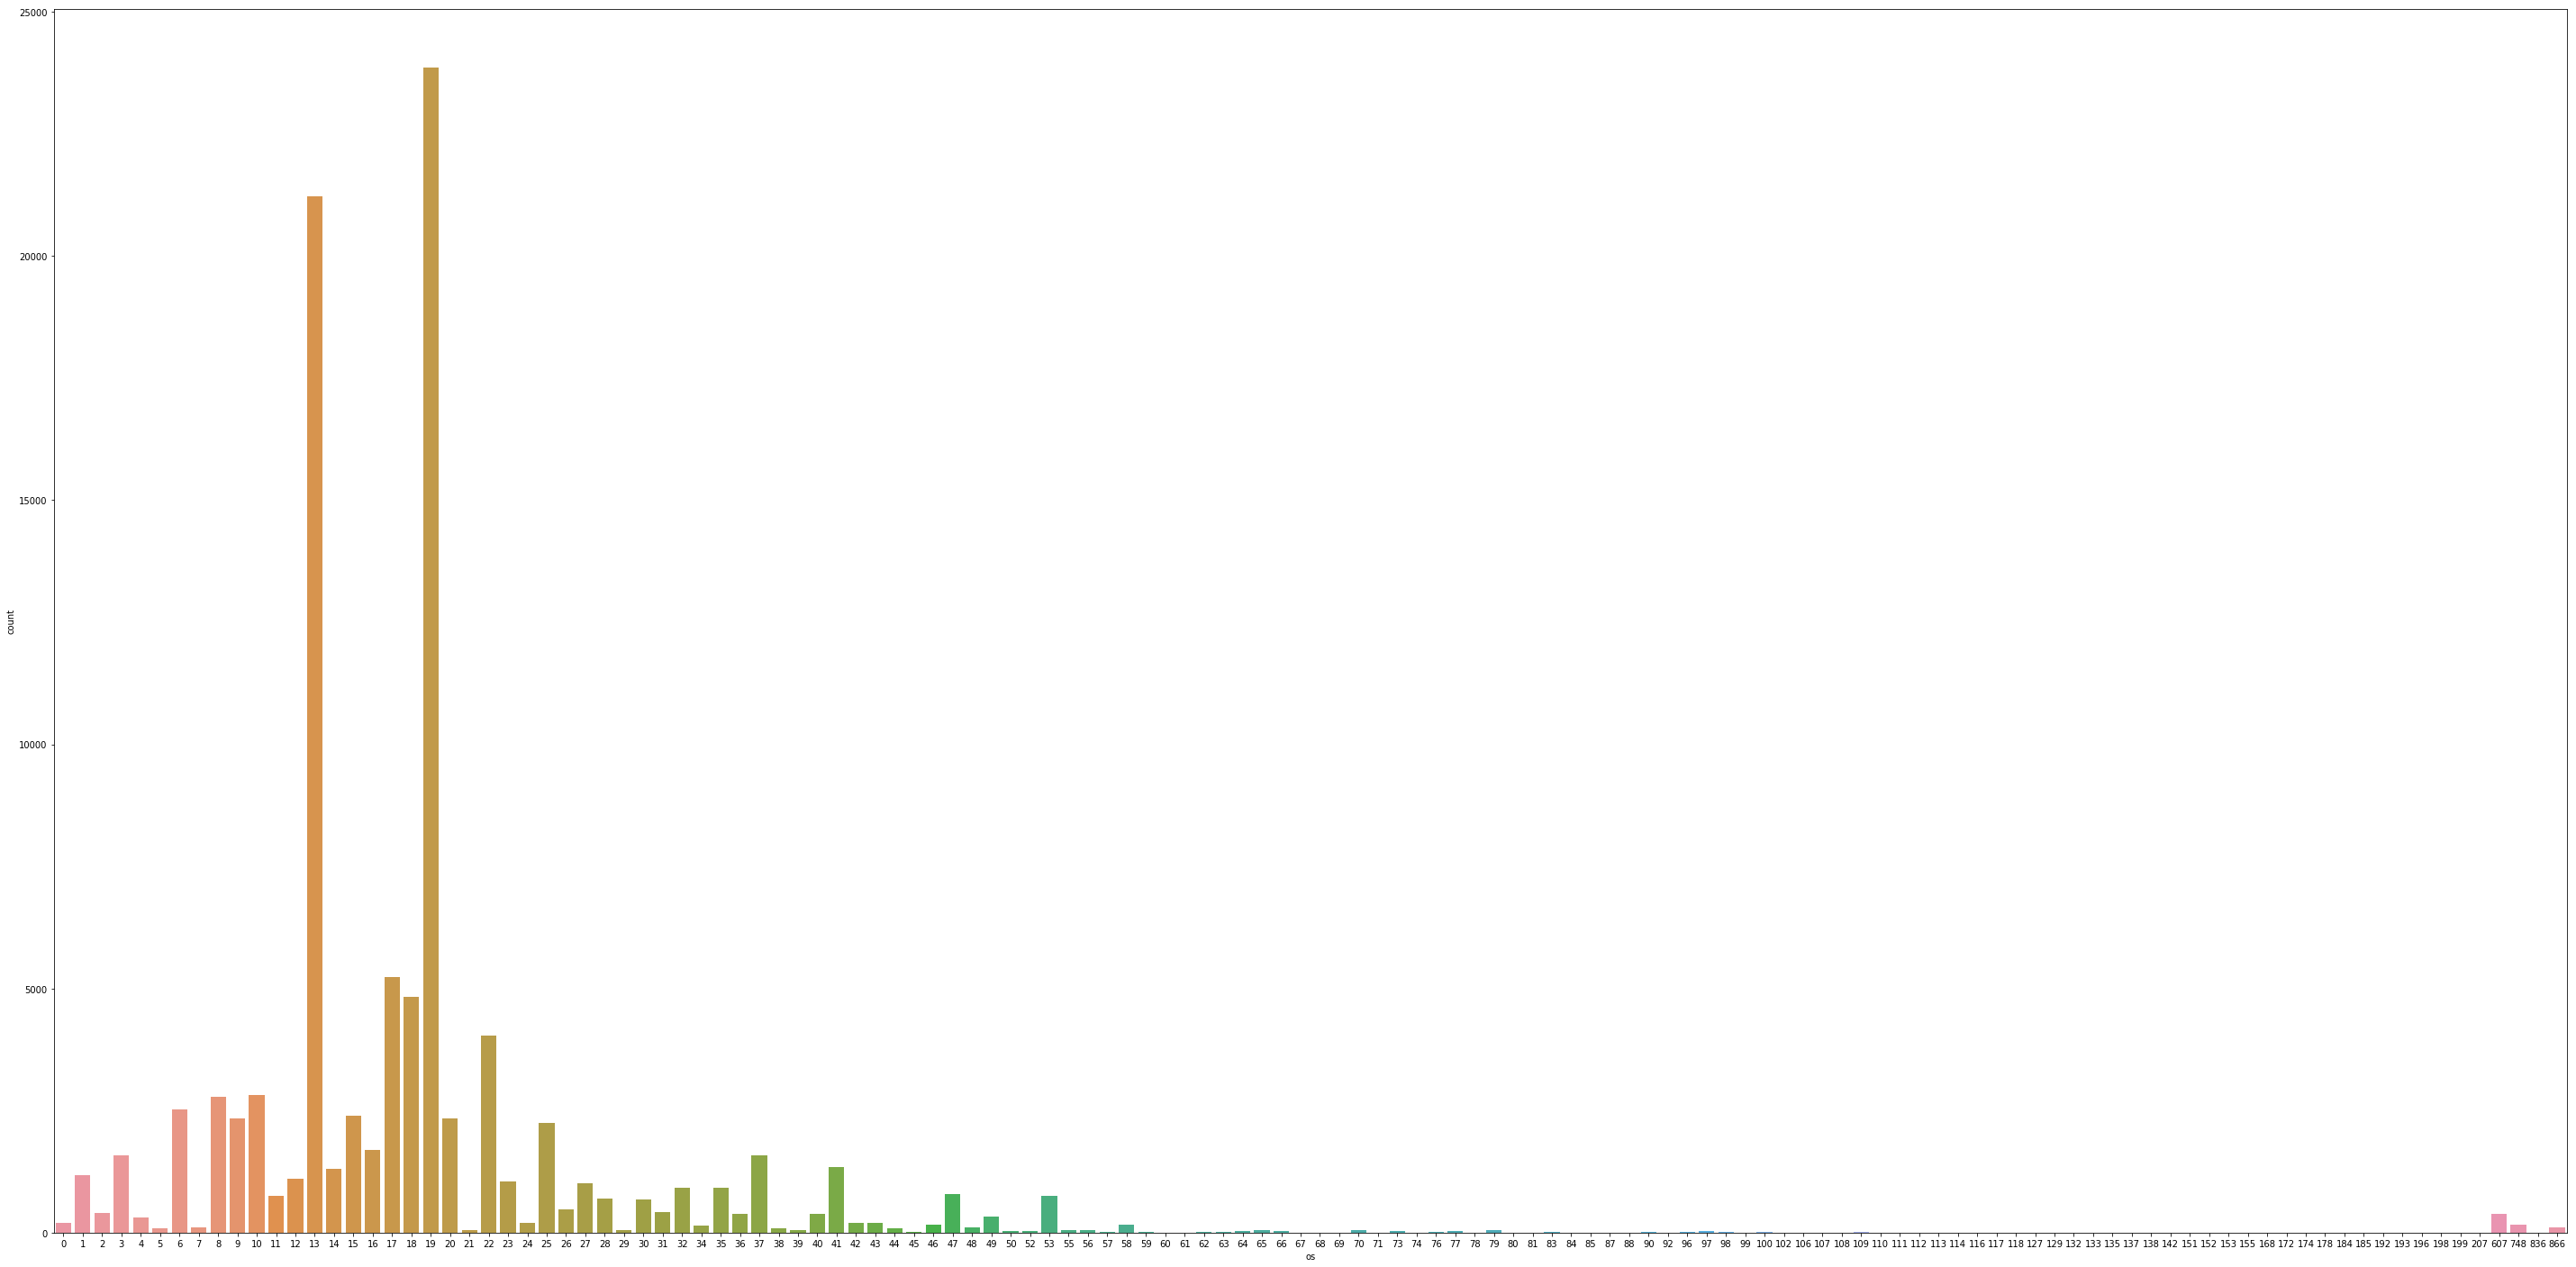

In [13]:
# # os: there are a couple commos OSes (android and ios?), though some are rare and can indicate suspicion 
plt.figure(figsize=(50, 25))
sns.countplot(x="os", data=train_sample)

Let's now look at the distribution of the target  variable 'is_attributed'.

In [14]:
# # target variable distribution
a = train_sample['is_attributed'].astype('object').value_counts()

b = len(train_sample.index)

a


0    99773
1      227
Name: is_attributed, dtype: int64

Only **about 0.2% of clicks are 'fraudulent'**, which is expected in a fraud detection problem. Such high class imbalance is probably going to be the toughest challenge of this problem.

#### Exploring the Data - Segmented Univariate Analysis

Let's now look at how the target variable varies with the various predictors.

In [15]:
# plot the average of 'is_attributed', or 'download rate'
# with app (clearly this is non-readable)
app_target = train_sample.groupby('app').is_attributed.agg(['mean', 'count'])
app_target

,mean,count
app,,
1,0.000000,3135
2,0.000000,11737
3,0.000219,18279
4,0.000000,58
5,0.074468,188
6,0.000000,1303
7,0.000000,981
8,0.001996,2004
9,0.000890,8992


This is clearly non-readable, so let's first get rid of all the apps that are very rare (say which comprise of less than 20% clicks) and plot the rest.

In [16]:
frequent_apps = train_sample.groupby('app').size().reset_index(name='count')
frequent_apps = frequent_apps[frequent_apps['count']>frequent_apps['count'].quantile(0.80)]
frequent_apps = frequent_apps.merge(train_sample, on='app', how='inner')
frequent_apps.head()

,app,count,ip,device,os,channel,click_time,is_attributed
0,1,3135,17059,1,17,135,2017-11-09 01:17:58,0
1,1,3135,52432,1,13,115,2017-11-07 17:22:52,0
2,1,3135,23706,1,27,124,2017-11-07 09:37:21,0
3,1,3135,58458,1,19,101,2017-11-09 14:27:57,0
4,1,3135,34067,1,15,134,2017-11-07 15:06:06,0


In [17]:
frequent_apps

,app,count,ip,device,os,channel,click_time,is_attributed
0,1,3135,17059,1,17,135,2017-11-09 01:17:58,0
1,1,3135,52432,1,13,115,2017-11-07 17:22:52,0
2,1,3135,23706,1,27,124,2017-11-07 09:37:21,0
3,1,3135,58458,1,19,101,2017-11-09 14:27:57,0
4,1,3135,34067,1,15,134,2017-11-07 15:06:06,0
5,1,3135,39217,1,19,125,2017-11-07 09:44:02,0
6,1,3135,17830,1,17,153,2017-11-09 02:30:02,0
7,1,3135,46132,1,13,153,2017-11-08 02:47:43,0
8,1,3135,18350,1,10,137,2017-11-07 02:07:57,0
9,1,3135,8046,1,19,153,2017-11-07 15:26:59,0


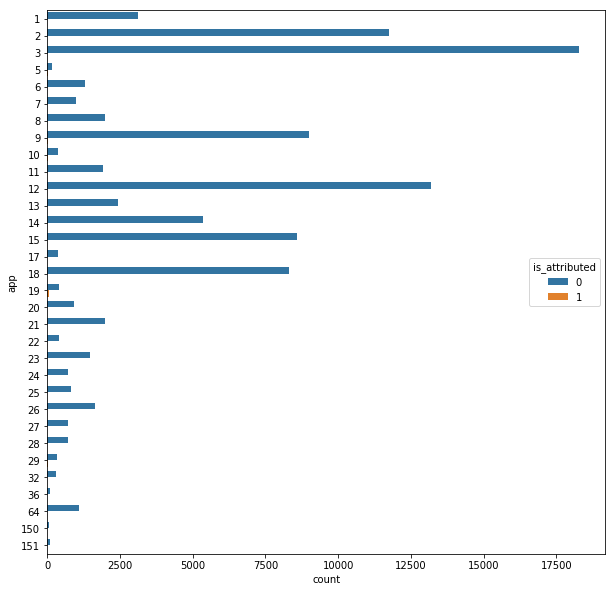

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(y="app", hue="is_attributed", data=frequent_apps);

You can do lots of other interesting ananlysis with the existing features. For now, let's create some new features which will probably improve the model.

### Feature Engineering

Let's now derive some new features from the existing ones. There are a number of features one can extract from ```click_time``` itself, and by grouping combinations of IP with other features.

#### Datetime Based Features


In [19]:
# Creating datetime variables
# takes in a df, adds date/time based columns to it, and returns the modified df
def timeFeatures(df):
    # Derive new features using the click_time column
    df['datetime'] = pd.to_datetime(df['click_time'])
    df['day_of_week'] = df['datetime'].dt.dayofweek
    df["day_of_year"] = df["datetime"].dt.dayofyear
    df["month"] = df["datetime"].dt.month
    df["hour"] = df["datetime"].dt.hour
    return df

In [20]:
# creating new datetime variables and dropping the old ones
train_sample = timeFeatures(train_sample)
train_sample.drop(['click_time', 'datetime'], axis=1, inplace=True)
train_sample.head()

,ip,app,device,os,channel,is_attributed,day_of_week,day_of_year,month,hour
0,22004,12,1,13,497,0,1,311,11,9
1,40024,25,1,17,259,0,1,311,11,13
2,35888,12,1,19,212,0,1,311,11,18
3,29048,13,1,13,477,0,1,311,11,4
4,2877,12,1,1,178,0,3,313,11,9


In [21]:
# datatypes
# note that by default the new datetime variables are int64
train_sample.dtypes

ip               uint16
app              uint16
device           uint16
os               uint16
channel          uint16
is_attributed     uint8
day_of_week       int64
day_of_year       int64
month             int64
hour              int64
dtype: object

In [22]:
# memory used by training data
print('Training dataset uses {0} MB'.format(train_sample.memory_usage().sum()/1024**2))

Training dataset uses 4.1008758544921875 MB


In [23]:
# lets convert the variables back to lower dtype again
int_vars = ['app', 'device', 'os', 'channel', 'day_of_week','day_of_year', 'month', 'hour']
train_sample[int_vars] = train_sample[int_vars].astype('uint16')

In [24]:
train_sample.dtypes

ip               uint16
app              uint16
device           uint16
os               uint16
channel          uint16
is_attributed     uint8
day_of_week      uint16
day_of_year      uint16
month            uint16
hour             uint16
dtype: object

In [25]:
# space used by training data
print('Training dataset uses {0} MB'.format(train_sample.memory_usage().sum()/1024**2))

Training dataset uses 1.8120574951171875 MB


#### IP Grouping Based Features

Let's now create some important features by grouping IP addresses with features such as os, channel, hour, day etc. Also, count of each IP address will also be a feature.

Note that though we are deriving new features by grouping IP addresses, using IP adress itself as a features is not a good idea. This is because (in the test data) if a new IP address is seen, the model will see a new 'category' and will not be able to make predictions (IP is a categorical variable, it has just been encoded with numbers).

In [26]:
# number of clicks by count of IP address
# note that we are explicitly asking pandas to re-encode the aggregated features 
# as 'int16' to save memory
ip_count = train_sample.groupby('ip').size().reset_index(name='ip_count').astype('int16')
ip_count.head()

,ip,ip_count
0,8,1
1,9,1
2,10,3
3,14,1
4,16,6


In [27]:
ip_count

,ip,ip_count
0,8,1
1,9,1
2,10,3
3,14,1
4,16,6
5,19,4
6,20,4
7,24,4
8,25,1
9,26,2


We can now merge this dataframe with the original training df. Similarly, we can create combinations of various features such as ip_day_hour (count of ip-day-hour combinations), ip_hour_channel, ip_hour_app, etc. 

The following function takes in a dataframe and creates these features.

In [190]:
# creates groupings of IP addresses with other features and appends the new features to the df
def grouped_features(df):
    # ip_count
    ip_count = df.groupby('ip').size().reset_index(name='ip_count').astype('uint16')
    ip_day_hour = df.groupby(['ip', 'day_of_week', 'hour']).size().reset_index(name='ip_day_hour').astype('uint16')
    ip_hour_channel = df[['ip', 'hour', 'channel']].groupby(['ip', 'hour', 'channel']).size().reset_index(name='ip_hour_channel').astype('uint16')
    ip_hour_os = df.groupby(['ip', 'hour', 'os']).channel.count().reset_index(name='ip_hour_os').astype('uint16')
    ip_hour_app = df.groupby(['ip', 'hour', 'app']).channel.count().reset_index(name='ip_hour_app').astype('uint16')
    ip_hour_device = df.groupby(['ip', 'hour', 'device']).channel.count().reset_index(name='ip_hour_device').astype('uint16')
    
    # merge the new aggregated features with the df
    df = pd.merge(df, ip_count, on='ip', how='left')
    del ip_count
    gc.collect()
    df = pd.merge(df, ip_day_hour, on=['ip', 'day_of_week', 'hour'], how='left')
    del ip_day_hour
    gc.collect()
    df = pd.merge(df, ip_hour_channel, on=['ip', 'hour', 'channel'], how='left')
    del ip_hour_channel
    gc.collect()
    df = pd.merge(df, ip_hour_os, on=['ip', 'hour', 'os'], how='left')
    del ip_hour_os
    gc.collect()
    df = pd.merge(df, ip_hour_app, on=['ip', 'hour', 'app'], how='left')
    del ip_hour_app
    gc.collect()
    df = pd.merge(df, ip_hour_device, on=['ip', 'hour', 'device'], how='left')
    del ip_hour_device
    gc.collect()
    return df

In [29]:
train_sample = grouped_features(train_sample)

In [30]:
train_sample.head()

,ip,app,device,os,channel,is_attributed,day_of_week,day_of_year,month,hour,ip_count,ip_day_hour,ip_hour_channel,ip_hour_os,ip_hour_app,ip_hour_device
0,22004,12,1,13,497,0,1,311,11,9,8,1,1,1,1,1
1,40024,25,1,17,259,0,1,311,11,13,149,4,1,1,1,8
2,35888,12,1,19,212,0,1,311,11,18,2,1,1,1,1,1
3,29048,13,1,13,477,0,1,311,11,4,3,1,1,1,1,1
4,2877,12,1,1,178,0,3,313,11,9,4,1,1,1,1,1


In [31]:
train_sample

,ip,app,device,os,channel,is_attributed,day_of_week,day_of_year,month,hour,ip_count,ip_day_hour,ip_hour_channel,ip_hour_os,ip_hour_app,ip_hour_device
0,22004,12,1,13,497,0,1,311,11,9,8,1,1,1,1,1
1,40024,25,1,17,259,0,1,311,11,13,149,4,1,1,1,8
2,35888,12,1,19,212,0,1,311,11,18,2,1,1,1,1,1
3,29048,13,1,13,477,0,1,311,11,4,3,1,1,1,1,1
4,2877,12,1,1,178,0,3,313,11,9,4,1,1,1,1,1
5,28127,3,1,17,115,0,3,313,11,1,2,1,1,1,1,1
6,17059,1,1,17,135,0,3,313,11,1,9,1,1,1,1,2
7,55969,9,1,25,442,0,1,311,11,10,5,1,1,1,1,1
8,61895,2,2,22,364,0,2,312,11,9,5,1,1,1,1,1
9,12564,3,1,19,135,0,2,312,11,12,2,1,1,1,1,1


In [32]:
print('Training dataset uses {0} MB'.format(train_sample.memory_usage().sum()/1024**2))

Training dataset uses 3.719329833984375 MB


In [33]:
# garbage collect (unused) object
gc.collect()

7340

### Modelling

Let's now build models to predict the variable ```is_attributed``` (downloaded). We'll try the several variants of boosting (adaboost, gradient boosting and XGBoost), tune the hyperparameters in each model and choose the one which gives the best performance.

In the original Kaggle competition, the metric for model evaluation is **area under the ROC curve**.


In [34]:
# create x and y train
X = train_sample.drop('is_attributed', axis=1)
y = train_sample[['is_attributed']]

# split data into train and test/validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80000, 15)
(80000, 1)
(20000, 15)
(20000, 1)


In [35]:
# check the average download rates in train and test data, should be comparable
print(y_train.mean())
print(y_test.mean())

is_attributed    0.002275
dtype: float64
is_attributed    0.00225
dtype: float64


#### AdaBoost

In [36]:
# adaboost classifier with max 600 decision trees of depth=2
# learning_rate/shrinkage=1.5

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

In [37]:
# fit
adaboost_model_1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.5, n_estimators=600, random_state=None)

In [38]:
# predictions
# the second column represents the probability of a click resulting in a download
predictions = adaboost_model_1.predict_proba(X_test)
predictions[:10]

array([[0.5259697 , 0.4740303 ],
       [0.52720083, 0.47279917],
       [0.533081  , 0.466919  ],
       [0.52194781, 0.47805219],
       [0.51032691, 0.48967309],
       [0.52721323, 0.47278677],
       [0.5183883 , 0.4816117 ],
       [0.52170927, 0.47829073],
       [0.52412251, 0.47587749],
       [0.51552875, 0.48447125]])

In [39]:
# metrics: AUC
metrics.roc_auc_score(y_test, predictions[:,1])

0.928385534118433

#### AdaBoost - Hyperparameter Tuning

Let's now tune the hyperparameters of the AdaBoost classifier. In this case, we have two types of hyperparameters - those of the component trees (max_depth etc.) and those of the ensemble (n_estimators, learning_rate etc.). 


We can tune both using the following technique - the keys of the form ```base_estimator_parameter_name``` belong to the trees (base estimator), and the rest belong to the ensemble.

In [40]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [i for i in range(2,10,1)],
              "n_estimators": [i for i in range(100,701,100)]
              
             }

In [41]:
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")

In [42]:
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)


In [43]:
# fit 
grid_search_ABC.fit(X_train, y_train)

Fitting 3 folds for each of 56 candidates, totalling 168 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed: 151.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.6, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'base_estimator__max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'n_estimators': [100, 200, 300, 400, 500, 600, 700]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [44]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.376959,0.158444,0.129638,0.013123,2,100,"{'base_estimator__max_depth': 2, 'n_estimators...",0.925026,0.974845,0.950067,0.949979,0.020339,5,0.994749,0.990833,0.993178,0.992920,1.609291e-03
1,12.686917,1.658401,0.300193,0.049905,2,200,"{'base_estimator__max_depth': 2, 'n_estimators...",0.926966,0.975725,0.955801,0.952831,0.020017,1,0.996306,0.995094,0.996461,0.995954,6.111043e-04
2,20.262377,2.247252,0.383308,0.080925,2,300,"{'base_estimator__max_depth': 2, 'n_estimators...",0.921206,0.975842,0.951779,0.949609,0.022358,8,0.997533,0.996251,0.997447,0.997077,5.849387e-04
3,19.718202,2.756639,0.407242,0.069967,2,400,"{'base_estimator__max_depth': 2, 'n_estimators...",0.920643,0.974585,0.956496,0.950575,0.022416,3,0.997991,0.996683,0.997996,0.997556,6.179779e-04
4,28.259560,3.046438,0.601706,0.037161,2,500,"{'base_estimator__max_depth': 2, 'n_estimators...",0.921696,0.972971,0.954477,0.949715,0.021202,6,0.998362,0.997692,0.998327,0.998127,3.077728e-04
5,32.287146,4.694104,0.654247,0.108747,2,600,"{'base_estimator__max_depth': 2, 'n_estimators...",0.921720,0.973335,0.953955,0.949670,0.021288,7,0.998494,0.997923,0.998417,0.998278,2.530744e-04
6,42.549347,0.423382,0.830796,0.017067,2,700,"{'base_estimator__max_depth': 2, 'n_estimators...",0.920447,0.972360,0.954145,0.948984,0.021506,10,0.998638,0.998110,0.998572,0.998440,2.349885e-04
7,8.451696,0.113965,0.180196,0.022374,3,100,"{'base_estimator__max_depth': 3, 'n_estimators...",0.929068,0.975118,0.949346,0.951178,0.018845,2,0.998201,0.997699,0.998152,0.998017,2.261376e-04
8,16.810960,0.252744,0.284250,0.003747,3,200,"{'base_estimator__max_depth': 3, 'n_estimators...",0.922014,0.973866,0.952860,0.949580,0.021296,9,0.999333,0.998902,0.998950,0.999062,1.928416e-04
9,25.444506,0.219180,0.400605,0.023087,3,300,"{'base_estimator__max_depth': 3, 'n_estimators...",0.921541,0.972749,0.956096,0.950129,0.021327,4,0.999683,0.999291,0.999361,0.999445,1.710191e-04


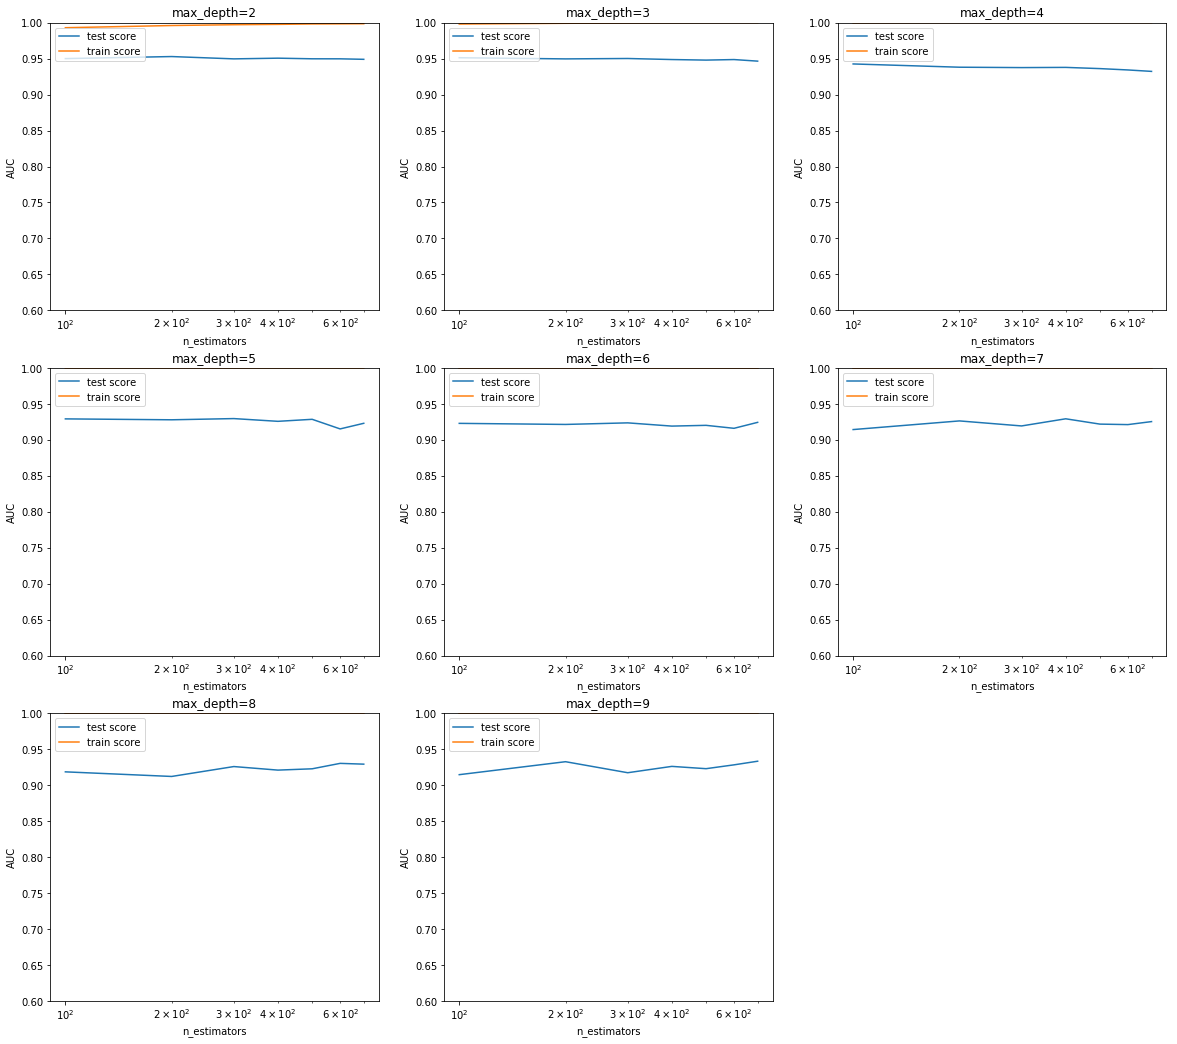

In [59]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(20,18))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(3,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

    


The results above show that:
- The ensemble with max_depth=5 is clearly overfitting (training auc is almost 1, while the test score is much lower)
- At max_depth=2, the model performs slightly better (approx 95% AUC) with a higher test score 

Thus, we should go ahead with ```max_depth=2``` and ```n_estimators=200```.

Note that we haven't experimented with many other important hyperparameters till now, such as ```learning rate```, ```subsample``` etc., and the results might be considerably improved by tuning them. We'll next experiment with these hyperparameters.

In [96]:
# model performance on test data with chosen hyperparameters

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
# learning rate is arbitrarily set, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    n_estimators=251,
    algorithm="SAMME")

ABC.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.6, n_estimators=251, random_state=None)

In [97]:
# predict on test data
predictions = ABC.predict_proba(X_test)
predictions[:10]

array([[0.5827331 , 0.4172669 ],
       [0.58432019, 0.41567981],
       [0.60027962, 0.39972038],
       [0.56658536, 0.43341464],
       [0.55056526, 0.44943474],
       [0.57936582, 0.42063418],
       [0.55720896, 0.44279104],
       [0.58834462, 0.41165538],
       [0.5875435 , 0.4124565 ],
       [0.55781515, 0.44218485]])

In [98]:
# roc auc
metrics.roc_auc_score(y_test, predictions[:, 1])

0.948926751858348

#### Gradient Boosting Classifier

Let's now try the gradient boosting classifier. We'll experiment with two main hyperparameters now - ```learning_rate``` (shrinkage) and ```subsample```. 

By adjusting the learning rate to less than 1, we can regularize the model. A model with higher learning_rate learns fast, but is prone to overfitting; one with a lower learning rate learns slowly, but avoids overfitting.

Also, there's a trade-off between ```learning_rate``` and ```n_estimators``` - the higher the learning rate, the lesser trees the model needs (and thus we usually tune only one of them).

Also, by subsampling (setting ```subsample``` to less than 1), we can have the individual models built on random subsamples of size ```subsample```. That way, each tree will be trained on different subsets and reduce the model's variance.

In [242]:
# parameter grid
param_grid = {"learning_rate": [0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]
             }

In [243]:
# adaboost with the tree as base estimator
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [244]:
# run grid search
folds = 3
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

grid_search_GBC.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.2, 0.6, 0.9], 'subsample': [0.3, 0.6, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [245]:
cv_results = pd.DataFrame(grid_search_GBC.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.447242,0.045598,0.034301,0.003602,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.903011,0.416863,0.815818,0.711896,0.211637,3,0.949804,0.520298,0.745394,0.738499,0.175413
1,4.179380,0.123059,0.030232,0.000462,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.917576,0.858086,0.566612,0.780761,0.153359,2,0.928564,0.882742,0.631728,0.814345,0.130477
2,3.613667,0.085742,0.031916,0.000791,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.887591,0.881949,0.837080,0.868874,0.022599,1,0.912777,0.904792,0.806797,0.874789,0.048188
3,3.516906,0.100340,0.038565,0.007344,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.817701,0.686456,0.547398,0.683854,0.110366,5,0.815906,0.725356,0.595952,0.712404,0.090261
4,4.220916,0.089750,0.028923,0.000814,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.721007,0.364321,0.223100,0.436145,0.209518,9,0.710688,0.327607,0.220601,0.419632,0.210393


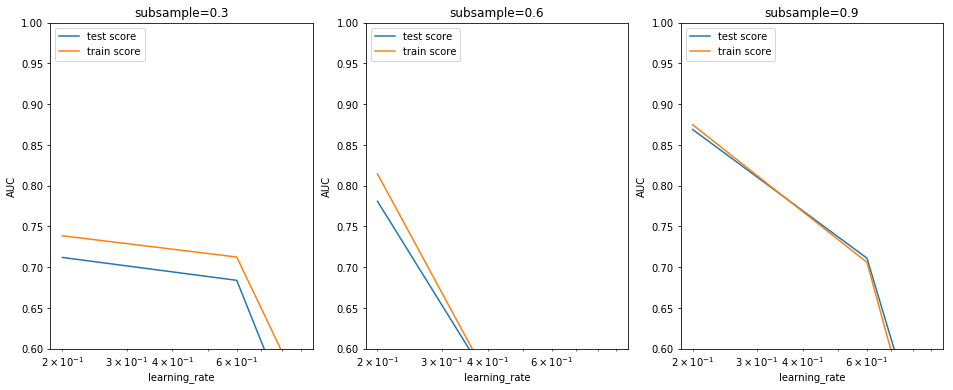

In [246]:
# # plotting
plt.figure(figsize=(16,6))


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


It is clear from the plot above that the model with a lower subsample ratio performs better, while those with higher subsamples tend to overfit. 

Also, a lower learning rate results in less overfitting.

#### XGBoost

Let's finally try XGBoost. The hyperparameters are the same, some important ones being ```subsample```, ```learning_rate```, ```max_depth``` etc.


In [247]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [248]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[9.9987620e-01, 1.2377757e-04],
       [9.9980235e-01, 1.9764129e-04],
       [9.9981219e-01, 1.8779545e-04],
       [9.9935341e-01, 6.4659910e-04],
       [9.9839455e-01, 1.6054598e-03],
       [9.9982888e-01, 1.7113073e-04],
       [9.9954700e-01, 4.5297624e-04],
       [9.9944913e-01, 5.5086729e-04],
       [9.9976951e-01, 2.3048650e-04],
       [9.9696469e-01, 3.0353032e-03]], dtype=float32)

In [249]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 94.85%


The roc_auc in this case is about 0.95% with default hyperparameters. Let's try changing the hyperparameters - an exhaustive list of XGBoost hyperparameters is here: http://xgboost.readthedocs.io/en/latest/parameter.html


Let's now try tuning the hyperparameters using k-fold CV. We'll then use grid search CV to find the optimal values of hyperparameters.

In [112]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      



In [113]:
# fit the model
model_cv.fit(X_train, y_train)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [114]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.161543,0.240509,0.160238,0.032741,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.914064,0.971373,0.962963,0.949467,0.025268,3,0.990450,0.984303,0.988183,0.987645,0.002538
1,5.660861,0.366335,0.131648,0.003256,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.926961,0.973582,0.961443,0.953995,0.019748,1,0.994016,0.986355,0.992693,0.991021,0.003343
2,4.591734,0.081860,0.116699,0.001630,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.924236,0.975867,0.951012,0.950372,0.021083,2,0.992880,0.989807,0.993936,0.992208,0.001752
3,4.804814,0.119045,0.140624,0.002820,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.885865,0.957231,0.940434,0.927843,0.030465,6,0.997522,0.991143,0.993425,0.994030,0.002639
4,5.361348,0.108322,0.138622,0.000808,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.893749,0.967978,0.955700,0.939142,0.032487,5,0.999624,0.997823,0.998964,0.998804,0.000744
5,4.698102,0.156089,0.137647,0.002833,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.923785,0.975658,0.947313,0.948919,0.021207,4,0.999633,0.999070,0.999660,0.999454,0.000272


In [123]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
#cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.161543,0.240509,0.160238,0.032741,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.914064,0.971373,0.962963,0.949467,0.025268,3,0.990450,0.984303,0.988183,0.987645,0.002538
1,5.660861,0.366335,0.131648,0.003256,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.926961,0.973582,0.961443,0.953995,0.019748,1,0.994016,0.986355,0.992693,0.991021,0.003343
2,4.591734,0.081860,0.116699,0.001630,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.924236,0.975867,0.951012,0.950372,0.021083,2,0.992880,0.989807,0.993936,0.992208,0.001752
3,4.804814,0.119045,0.140624,0.002820,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.885865,0.957231,0.940434,0.927843,0.030465,6,0.997522,0.991143,0.993425,0.994030,0.002639
4,5.361348,0.108322,0.138622,0.000808,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.893749,0.967978,0.955700,0.939142,0.032487,5,0.999624,0.997823,0.998964,0.998804,0.000744


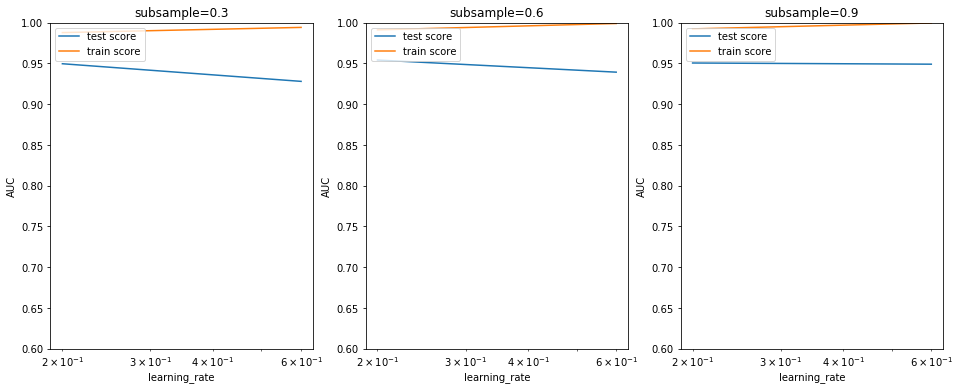

In [124]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

The results show that a subsample size of 0.6 and learning_rate of about 0.2 seems optimal. 
Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters). 


Let's build a final model with the chosen hyperparameters.

In [125]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic',
       params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.6, 'objective': 'binary:logistic'},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [126]:
# predict
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[9.9987620e-01, 1.2377757e-04],
       [9.9980235e-01, 1.9764129e-04],
       [9.9981219e-01, 1.8779545e-04],
       [9.9935341e-01, 6.4659910e-04],
       [9.9839455e-01, 1.6054598e-03],
       [9.9982888e-01, 1.7113073e-04],
       [9.9954700e-01, 4.5297624e-04],
       [9.9944913e-01, 5.5086729e-04],
       [9.9976951e-01, 2.3048650e-04],
       [9.9696469e-01, 3.0353032e-03]], dtype=float32)

The first column in y_pred is the P(0), i.e. P(not fraud), and the second column is P(1/fraud).

In [127]:
# roc_auc
auc = sklearn.metrics.roc_auc_score(y_test, y_pred[:, 1])
auc

0.9484868732425735

In [128]:
# feature importance
importance = dict(zip(X_train.columns, model.feature_importances_))
importance

{'ip': 0.04729222,
 'app': 0.27878824,
 'device': 0.17192616,
 'os': 0.09987429,
 'channel': 0.21394157,
 'day_of_week': 0.02267693,
 'day_of_year': 0.0,
 'month': 0.0,
 'hour': 0.03604142,
 'ip_count': 0.121292084,
 'ip_day_hour': 0.0,
 'ip_hour_channel': 0.0,
 'ip_hour_os': 0.008167093,
 'ip_hour_app': 0.0,
 'ip_hour_device': 0.0}

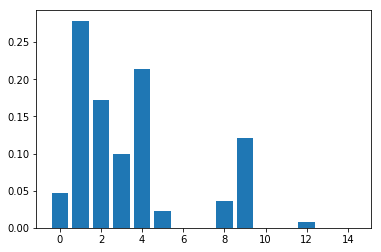

In [129]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

### Predictions on Test Data

Since this problem is hosted on Kaggle, you can  choose to make predictions on the test data and submit your results. Please note the following points and recommendations if you go ahead with Kaggle:

Recommendations for training:
- We have used only a fraction of the training set (train_sample, 100k rows), the full training data on Kaggle (train.csv) has about 180 million rows. You'll get good results only if you train the model on a significant portion of the training dataset.  
- Because of the size, you'll need to use Kaggle kernels to train the model on full training data. Kaggle kernels provide powerful computation capacities on cloud (for free). 
- Even on the kernel, you may need to use a portion of the training dataset (try using the last 20-30 million rows).
- Make sure you save memory by following some tricks and best practices, else you won't be able to train the model at all on a large dataset.



In [257]:
# reading training data

# specify column dtypes to save memory (by default pandas reads some columns as floats)
dtypes = {
        'ip'            : 'uint16',
        'app'           : 'uint16',
        'device'        : 'uint16',
        'os'            : 'uint16',
        'channel'       : 'uint16',
        'is_attributed' : 'uint8',
        'click_id'      : 'uint32' # note that click_id is only in test data, not training data
        }


test_path = "Datasets/TalkingData Case Study/test.csv"
colnames=['click_id','ip','app','device','os', 'channel', 'click_time']

# read training data
test_final = pd.read_csv(test_path, dtype=dtypes, usecols=colnames)


In [258]:
gc.collect()

0

In [259]:
colnames1=['click_id','is_attributed']
# read submission file
sample_sub = pd.read_csv('Datasets/TalkingData Case Study/sample_submission.csv', dtype = dtypes, usecols = colnames1)
sample_sub.head()

,click_id,is_attributed
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [260]:
gc.collect()

0

In [261]:
# predictions on test data
test_final = timeFeatures(test_final)
test_final.head()

,click_id,ip,app,device,os,channel,click_time,datetime,day_of_week,day_of_year,month,hour
0,0,5744,9,1,3,107,2017-11-10 04:00:00,2017-11-10 04:00:00,4,314,11,4
1,1,54365,9,1,3,466,2017-11-10 04:00:00,2017-11-10 04:00:00,4,314,11,4
2,2,6751,21,1,19,128,2017-11-10 04:00:00,2017-11-10 04:00:00,4,314,11,4
3,3,12941,15,1,13,111,2017-11-10 04:00:00,2017-11-10 04:00:00,4,314,11,4
4,4,57544,12,1,13,328,2017-11-10 04:00:00,2017-11-10 04:00:00,4,314,11,4


In [262]:
test_final.drop(['click_time', 'datetime'], axis=1, inplace=True)

In [263]:
test_final.head()

,click_id,ip,app,device,os,channel,day_of_week,day_of_year,month,hour
0,0,5744,9,1,3,107,4,314,11,4
1,1,54365,9,1,3,466,4,314,11,4
2,2,6751,21,1,19,128,4,314,11,4
3,3,12941,15,1,13,111,4,314,11,4
4,4,57544,12,1,13,328,4,314,11,4


In [264]:
#test_final[categorical_cols]=test_final[categorical_cols].apply(lambda x: le.fit_transform(x))

In [265]:
test_final.dtypes

click_id       uint32
ip             uint16
app            uint16
device         uint16
os             uint16
channel        uint16
day_of_week     int64
day_of_year     int64
month           int64
hour            int64
dtype: object

In [266]:
# number of clicks by IP
ip_count = test_final.groupby('ip')['channel'].count().reset_index()
ip_count.columns = ['ip', 'ip_count']
ip_count.head()

,ip,ip_count
0,0,239
1,1,1
2,2,7
3,3,64
4,4,176


In [267]:
#merge this with the training data
test_final = pd.merge(test_final, ip_count, on='ip', how='left')


In [268]:
gc.collect()

108

In [1]:
test_final = grouped_features(test_final)

In [238]:
del ip_count

In [239]:
gc.collect()

7

In [240]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18790469 entries, 0 to 18790468
Data columns (total 17 columns):
click_id           uint32
ip                 uint16
app                uint16
device             uint16
os                 uint16
channel            uint16
day_of_week        int64
day_of_year        int64
month              int64
hour               int64
ip_count_x         int64
ip_count_y         uint16
ip_day_hour        uint16
ip_hour_channel    uint16
ip_hour_os         uint16
ip_hour_app        uint16
ip_hour_device     uint16
dtypes: int64(5), uint16(11), uint32(1)
memory usage: 1.3 GB


**The rest of the work has been left as the amount of data is too excessive to be compute on a single core**

In [3]:
# gc.collect()

In [2]:
# # predict on test data
# y_pred_test = model.predict_proba(test_final.drop('click_id', axis=1))
# y_pred_test[:10]

In [ ]:
# # # create submission file
# sub = pd.DataFrame()
# sub['click_id'] = test_final['click_id']
# sub['is_attributed'] = y_pred_test[:, 1]
# sub.head()

In [ ]:
# sub.to_csv('answer_03.csv', float_format='%.8f', index=False)

In [ ]:
# # model

# dtrain = xgb.DMatrix(X_train, y_train)
# del X_train, y_train
# gc.collect()

# watchlist = [(dtrain, 'train')]
# model = xgb.train(params, dtrain, 30, watchlist, maximize=True, verbose_eval=1)

In [ ]:
# del dtrain
# gc.collect()

In [ ]:
# # Plot the feature importance from xgboost
# plot_importance(model)
# plt.gcf().savefig('feature_importance_xgb.png')


In [ ]:
# # Load the test for predict 
# test = pd.read_csv(path+"test.csv")

In [ ]:
# test.head()

In [ ]:
# # number of clicks by IP
# ip_count = train_sample.groupby('ip')['channel'].count().reset_index()
# ip_count.columns = ['ip', 'count_by_ip']
# ip_count.head()

In [ ]:
# test = pd.merge(test, ip_count, on='ip', how='left', sort=False)
# gc.collect()

In [ ]:
# test = timeFeatures(test)
# test.drop(['click_time', 'datetime'], axis=1, inplace=True)
# test.head()

In [ ]:
# print(test.columns)
# print(train_sample.columns)

In [ ]:
# test = test[['click_id','ip', 'app', 'device', 'os', 'channel', 'day_of_week',
#        'day_of_year', 'month', 'hour', 'ip_count']]

In [ ]:
# dtest = xgb.DMatrix(test.drop('click_id', axis=1))

In [ ]:
# # Save the predictions
# sub = pd.DataFrame()
# sub['click_id'] = test['click_id']

# sub['is_attributed'] = model.predict(dtest, ntree_limit=model.best_ntree_limit)
# sub.to_csv('xgb_sub.csv', float_format='%.8f', index=False)

In [ ]:
# sub.shape